<a href="https://colab.research.google.com/github/marquinhosmar/datascience-mvp/blob/main/Projeto_MVP_An%C3%A1lise_dos_Investimentos_dos_Estados_Brasileiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Marcos Correia Araujo

**Matrícula:** 4052025000145

**Dataset:** [Siconfi](https://apidatalake.tesouro.gov.br/ords/siconfi/tt/dca)

**---OBSERVAÇÕES IMPORTANTES---**
O dataset do SICONFI (Sistema de Informações Contábeis e Fiscais do Setor Público Brasileiro) é uma plataforma do Tesouro Nacional que recebe, processa e divulga informações contábeis, financeiras e estatísticas de todos os entes federativos. É uma ferramenta essencial para a transparência e o acompanhamento da gestão fiscal do país.


##Descrição do Problema

O conjunto de dados do Siconfi é um conjunto de dados multivariado que consiste em medidas que permitem analisar várias situações financeiras dos estados brasieliros, tais como: evolução da **Receita** e **Despesa Pública**, capacidade de **Investimento** dos estados, situação da responsabilidade fiscal, depência de transferência de transferência federais, comparativos entre regiões, qualidade do gasto público, entre outros.

O investimento público é universalmente reconhecido como um pilar para o desenvolvimento econômico e social. Por meio da formação de capital em infraestrutura, educação e saúde, ele não apenas estimula a atividade econômica no curto prazo, mas também eleva a produtividade e a competitividade no longo prazo, sendo um instrumento essencial para a redução das desigualdades. Em um país de dimensões continentais e com profundas disparidades regionais como o Brasil, a alocação de investimentos pelos governos estaduais assume um papel ainda mais crítico, sendo fundamental para promover a convergência de renda e garantir o acesso equitativo a serviços públicos de qualidade.

O presente trabalho tem como objetivos principais analisar os investimentos públicos dos entes estaduais durante o período de 2018 a 2024. Bem como a relação investimento sobre a despesa total.


## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- O **Investimento** público segue um padrão uniforme durante um determinado período de tempo ou apresenta variações?

- Eficiência fiscal: avaliar se a maior **Receita Total** ou maior **Despesa Total** está associada a maior capacidade de investimento.

-  Estados com maiores gastos brutos são os que mais realizam investimentos em termos percentuais?

- Prioridade em Investimentos: avaliar a tendência da alocação orçamentária. Estados priorizam despesas correntes em detrimento dos investimentos ao longo do tempo?

## Tipo de Problema


Este é um problema de **classificação supervisionada**. Dado um conjunto de características o objetivo é classificar se um estado está em "um risco fiscal alto" com base em seus indicadores de investimento público.

## Seleção de Dados

O dataset do **siconfi** é um conjunto de dados de domínio público, amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina. É  utilizado para diversas finalidades de pesquisas econômicas, bem como no meio acadêmico. É necessária uma etapa de seleção de dados externa, pois o dataset  possui muitos dados e de acordo com a finalidade é importante definir o que será filtrado.

O dataset poderia ser carregado diretamente da **api** do **tesouro nacional**, porém para acelerar o processo de importação de dados e garantir que o dataset possa ser importado diretamente do github através de um arquivo csv foi feito os seguintes passos até obter um dataset pronto para importação:

**1**. Inicialmente foi rodado esse código abaixo em outro notebook do colab definindo a coleta:
```
!pip install ipeadatapy

import pandas as pd

import requests

import ipeadatapy


 estados = pd.DataFrame({

    'sigla': ["AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA",
              "MG", "MS", "MT", "PA", "PB", "PE", "PI", "PR", "RJ", "RN",
              "RO", "RR", "RS", "SC", "SE", "SP", "TO"],
    'codigo': ["12", "27", "16", "13", "29", "23", "53", "32", "52", "21",
               "31", "50", "51", "15", "25", "26", "22", "41", "33", "24",
               "11", "14", "43", "42", "28", "35", "17"]
})


exercicio = range (2018, 2024)`


resultados_lista = []
```









**O que o código acima executa:**

Inicialmente instala as bibliotecas:
- *!pip install ipeadatapy :* essa biblioteca permite acessar dados ecconômicos e sociais diretamente do **IPEA** (Instituto de Pesquisa Econômica Aplicada).
- *pandas as pd* : para manipulação de tabelas (Dataframes).
- *requests* : para fazer requisições à internet.
- *ipeadatapy* : para acessar séries temporais de dados públicos fornecidos pelo **IPEA**


`estados = pd.DataFrame({`

    'sigla': ["AC", "AL",....
    'codigo': ["12", "27"....



O que faz: Cria um DataFrame com dois campos:

- sigla: a sigla da unidade da federação (UF).

- codigo: o código numérico do **IBGE** (Instituto Nacional de Geografia e Estatística) correspondente a cada estado.

Por que é útil: Esses códigos geralmente são usados para buscar ou filtrar dados por estado em APIs ou bases como a do **IPEA**.

- Período analisado corresponde aos anos de 2018 até 2024.

- Será criado uma lista vazia onde os dados coletados de cada estado e ano serão armazenados em:

`resultados_lista = [ ]`

**2**. Coleta de dados - LOOP UF x ANO:

```
for uf_codigo in estados['codigo']:
    for ano in exercicio:
```



        url_base = "https://apidatalake.tesouro.gov.br/ords/siconfi/tt/dca"
        params = {'an_exercicio': ano, 'id_ente': uf_codigo}

        try:
            response = requests.get(url_base, params=params)
            status = response.status_code
            sigla_uf = estados.loc[estados['codigo'] == uf_codigo, 'sigla'].iloc[0]
            print(f"Status da resposta: {status} para UF {sigla_uf} ano {ano}")

            if status == 200:
                dados = response.json()
                items_list = dados.get('items', [])

                if not items_list:
                    print(f"  -> Aviso: Nenhum item retornado para {sigla_uf} em {ano}.")
                    continue

                items = pd.DataFrame(items_list)

                # Adiciona colunas de metadados
                items['UF'] = sigla_uf
                items['Codigo_UF'] = uf_codigo
                items['Ano'] = ano

                # Converte 'valor' para número
                items['valor'] = pd.to_numeric(items['valor'], errors='coerce')

                # Armazena na lista
                resultados_lista.append(items)

            else:
                print(f"  -> Erro na requisição para {sigla_uf} em {ano}. Status: {status}")
                continue

        except requests.exceptions.RequestException as e:
            print(f"  -> Erro de conexão para {sigla_uf} em {ano}: {e}")
            continue

**O que o código acima executa:**

Está sendo utilizando um loop aninhado para iterar sobre os códigos dos estados `(uf_codigo)` e os anos `(exercicio)`, com o objetivo de coletar os dados de forma sistemática. Aqui está um detalhe do que está funcionando e algumas observações:

***Estrutura do Loop:*** `for uf_codigo in estados['codigo']:` e `for ano in exercicio:`. Isso garante que está tentando coletar dados para cada UF em cada ano

***Tratamento de Requisição e Erros*** `(try-except)`: usando um `try-except` é possível capturar erros de conexão. Isso evita que o script pare no meio da execução se houver um problema de rede ou se a API não responder.

***Verificação de Status HTTP:*** `status == 200` essa verificação antes de tentar processar a resposta é essencial pois garante que só se trabalhe com dados quando a requisição foi bem-sucedida.

***Extração e Verificação de items***: Usar` dados.get('items', [])` é uma forma de acessar a chave `items`, evitando erros caso ela não exista. A verificação` if not items_list:` é uma forma para pular iterações onde não há dados, evitando criar DataFrames vazios desnecessariamente.

***Criação de DataFrame e Adição de Metadados***: `items = pd.DataFrame(items_list)` transforma os `items_list` em um DataFrame do Pandas para cada iteração e adiciona as colunas de metadados `(UF, Codigo, Ano)`. Isso permite que ao final tenha-se um DataFrame consolidado com todas as informações contextuais.

***Conversão de valor para Numérico:*** converter a coluna `'valor'` para numérico (com `errors='coerce'` para tratar valores não numéricos como `NaN`) é uma prática de limpeza de dados logo na coleta. Isso prepara os dados para cálculos futuros.

***Armazenamento na Lista*** `resultados_lista.append(items)`: Está sendo adicionando cada DataFrame temporário à lista.

**3.** Consolidação do DataFrame final


Junta todos os dados brutos em um único DataFrame
'''
resultados_brutos = pd.concat(resultados_lista, ignore_index=True)
'''

```
# Junta todos os dados brutos em um único DataFrame
resultados_brutos = pd.concat(resultados_lista, ignore_index=True)
```



**4**. Exporta o DataFrame para um arquivo CSV:

`resultados_brutos.to_csv("dfsiconfi_resultados_brutos", index=False)`

**5.** O referido DataFrame é carregado para o github, de onde estar pronto para ser importado e iniciar o processo de análise:
```
url = "https://raw.githubusercontent.com/marquinhosmar/datascience-mvp/refs/heads/main/dfsiconfi_resultados_brutos.csv"

```

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset `dfsiconfi_resultados_brutos.csv` que estar alocado no github.

In [36]:
# importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [37]:
# importação do dataset e guarda em um dataframe chamado df

url = "https://raw.githubusercontent.com/marquinhosmar/datascience-mvp/refs/heads/main/dfsiconfi_resultados_brutos.csv"
df = pd.read_csv(url)


In [38]:
# confirmando que o objeto df é um DataFrame do Pandas:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset do Siconfi, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset `df` possui 470.990 instâncias (observações), e 14 colunas. As características de medição são do tipo`float64` (ou ponto flutuante de 64 bits) é um tipo numérico usado para representar números decimais (com casas após a vírgula). Temos também o `int64` (ou inteiro de 64 bits) que é um tipo numérico usado para representar números inteiros (sem casas decimais). E por fim o tipo `object` que é um tipo de dados mais genérico, geralmente ele é usado para armazenar texto (strings).
Não existe valores nulos e nem dados faltantes.

In [39]:
# total de instâncias
# tipos de dados por coluna
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 470990

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470990 entries, 0 to 470989
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   exercicio    470990 non-null  int64  
 1   instituicao  470990 non-null  object 
 2   cod_ibge     470990 non-null  int64  
 3   uf           470990 non-null  object 
 4   anexo        470990 non-null  object 
 5   rotulo       470990 non-null  object 
 6   coluna       470990 non-null  object 
 7   cod_conta    470990 non-null  object 
 8   conta        470990 non-null  object 
 9   valor        470990 non-null  float64
 10  populacao    470990 non-null  int64  
 11  UF           470990 non-null  object 
 12  Codigo_UF    470990 non-null  int64  
 13  Ano          470990 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 50.3+ MB
None


In [40]:
# primeiras 5 linhas
df.head()

,exercicio,instituicao,cod_ibge,uf,anexo,rotulo,coluna,cod_conta,conta,valor,populacao,UF,Codigo_UF,Ano
0,2018,Governo do Estado do Acre,12,AC,DCA-Anexo I-AB,Padrão,31/12/2018,P1.0.0.0.0.00.00,1.0.0.0.0.00.00 - Ativo,5.076948e+09,816687,AC,12,2018
1,2018,Governo do Estado do Acre,12,AC,DCA-Anexo I-AB,Padrão,31/12/2018,P1.1.0.0.0.00.00,1.1.0.0.0.00.00 - Ativo Circulante,1.181327e+09,816687,AC,12,2018
2,2018,Governo do Estado do Acre,12,AC,DCA-Anexo I-AB,Padrão,31/12/2018,P1.1.1.0.0.00.00,1.1.1.0.0.00.00 - Caixa e Equivalentes de Caixa,4.676028e+08,816687,AC,12,2018
3,2018,Governo do Estado do Acre,12,AC,DCA-Anexo I-AB,Padrão,31/12/2018,P1.1.1.1.0.00.00,1.1.1.1.0.00.00 - Caixa e Equivalentes de Caix...,4.676028e+08,816687,AC,12,2018
4,2018,Governo do Estado do Acre,12,AC,DCA-Anexo I-AB,Padrão,31/12/2018,P1.1.1.1.1.00.00,1.1.1.1.1.00.00 - Caixa e Equivalentes de Caix...,4.676028e+08,816687,AC,12,2018


In [41]:
# últimas 5 linhas
print(df.tail())

        exercicio                     instituicao  cod_ibge  uf  \
470985       2023  Governo do Estado do Tocantins        17  TO   
470986       2023  Governo do Estado do Tocantins        17  TO   
470987       2023  Governo do Estado do Tocantins        17  TO   
470988       2023  Governo do Estado do Tocantins        17  TO   
470989       2023  Governo do Estado do Tocantins        17  TO   

                 anexo  rotulo      coluna                      cod_conta  \
470985  DCA-Anexo I-HI  Padrão  31/12/2023               P4.9.9.6.0.00.00   
470986  DCA-Anexo I-HI  Padrão  31/12/2023               P4.9.9.6.1.00.00   
470987  DCA-Anexo I-HI  Padrão  31/12/2023               P4.9.9.9.0.00.00   
470988  DCA-Anexo I-HI  Padrão  31/12/2023               P4.9.9.9.1.00.00   
470989  DCA-Anexo I-HI  Padrão  31/12/2023  ResultadoPatrimonialDoPeriodo   

                                                    conta         valor  \
470985  4.9.9.6.0.00.00 - Indenizações, Restituições e...  

In [42]:
# Verificando a quantidade de valores nulos por coluna
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
exercicio      0
instituicao    0
cod_ibge       0
uf             0
anexo          0
rotulo         0
coluna         0
cod_conta      0
conta          0
valor          0
populacao      0
UF             0
Codigo_UF      0
Ano            0
dtype: int64


In [43]:
# quantas linhas têm ao menos um valor vazio
df.isnull().any(axis=1).sum()

np.int64(0)

## Atributos do Dataset

O dataset `df` contém 470.990 instâncias com 14 colunas:

- ***exercicio*** : o ano em que os fatos contábeis ocorreram e foram registrados.
- ***instituicao*** : descrição do nome do Estado.
- ***cod_ibge*** : código do estado segundo a classificação do IBGE.
- ***uf*** : sigla do estado.
- ***anexo*** :  indica em qual anexo dos demonstrativos contábeis ou fiscais aquela conta aparece ou deve ser demonstrada, conforme exigências da contabilidade pública brasileira.
- ***rotulo*** : é o nome oficial e padronizado da conta contábil, definido pela autoridade competente (como o Tesouro Nacional no caso do PCASP).
- ***coluna*** : dia, mê e ano (coincide com o exercício).
- ***cod_conta*** : número da conta do plano de contas.
- ***conta*** : nome da conta.
- ***valor*** : representa o montante financeiro associado àquela conta contábil.
- ***populacao*** : população do estado.
- ***UF***: repete novamente a UF do estado.
- ***Codigo_UF*** : código IBGE da UF.
- ***Ano***: coincide com o ano de exercício.

#Tratamento dos dados

Baseado no foco do problema a ser analisado e nas hipóteses que precisam ser respondidas, será feito alguns comandos para enxugar e tratar os dados disponíveis no DataFrame `df`:

In [44]:
# Garante que a coluna 'valor' seja numérica
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')

# Remove linhas sem valor numérico
df = df.dropna(subset=['valor'])

# Função para aplicar os padrões de contas por ano
def get_padroes_conta(ano):
    if ano <= 2017:
        return {
            'corrente': "3.0.00.00.00.00 - Despesas Correntes",
            'capital': "4.0.00.00.00.00 - Despesas de Capital",
            'rc': "1.0.0.0.00.00.00 - Receitas Correntes",
            'rk': "2.0.0.0.00.00.00 - Receitas de Capital",
            'rc_intra': "7.0.0.0.00.00.00 - Receitas Correntes",
            'rk_intra': "8.0.0.0.00.00.00 - Receitas de Capital",
            'investimento': "4.4.00.00.00.00 - Investimentos"
        }
    else:
        return {
            'corrente': "3.0.00.00.00 - Despesas Correntes",
            'capital': "4.0.00.00.00 - Despesas de Capital",
            'rc': "1.0.0.0.00.0.0 - Receitas Correntes",
            'rk': "2.0.0.0.00.0.0 - Receitas de Capital",
            'rc_intra': "7.0.0.0.00.0.0 - Receitas Correntes",
            'rk_intra': "8.0.0.0.00.0.0 - Receitas de Capital",
            'investimento': "4.4.00.00.00 - Investimentos"
        }

# Lista para armazenar os resultados
resumo_lista = []

# Loop para resumir os dados como no modelo original
for (uf, cod, ano), grupo in df.groupby(['UF', 'Codigo_UF', 'Ano']):
    padroes = get_padroes_conta(ano)

    # Filtragens
    despesas_correntes = grupo[
        grupo['conta'].str.contains(padroes['corrente'], case=False, na=False, regex=False) &
        grupo['coluna'].str.contains("Despesas Liquidadas", case=False, na=False)
    ]
    despesas_capital = grupo[
        grupo['conta'].str.contains(padroes['capital'], case=False, na=False, regex=False) &
        grupo['coluna'].str.contains("Despesas Liquidadas", case=False, na=False)
    ]

    receitas_correntes = grupo[
        grupo['conta'].str.contains(padroes['rc'], na=False, regex=False) &
        grupo['coluna'].str.contains("Realizadas", case=False, na=False)
    ]
    receitas_capital = grupo[
        grupo['conta'].str.contains(padroes['rk'], na=False, regex=False) &
        grupo['coluna'].str.contains("Realizadas", case=False, na=False)
    ]
    receitas_correntes_IN = grupo[
        grupo['conta'].str.contains(padroes['rc_intra'], na=False, regex=False) &
        grupo['coluna'].str.contains("Realizadas", case=False, na=False)
    ]
    receitas_capital_IN = grupo[
        grupo['conta'].str.contains(padroes['rk_intra'], na=False, regex=False) &
        grupo['coluna'].str.contains("Realizadas", case=False, na=False)
    ]
    investimentos = grupo[
        grupo['conta'].str.contains(padroes['investimento'], case=False, na=False, regex=False) &
        grupo['coluna'].str.contains("Despesas Liquidadas", case=False, na=False)
    ]

    # Cálculos
    exc = receitas_correntes['valor'].sum() + receitas_capital['valor'].sum()
    intra = receitas_correntes_IN['valor'].sum() + receitas_capital_IN['valor'].sum()
    total_receita = exc + intra
    total_despesa = despesas_correntes['valor'].sum() + despesas_capital['valor'].sum()
    total_investimento = investimentos['valor'].sum()

    # Adiciona à lista
    resumo_lista.append({
        "UF": uf,
        "Codigo_UF": cod,
        "Ano": ano,
        "Receita_Total": total_receita,
        "Receita_Exceto_Intra": exc,
        "Receita_Corrente": receitas_correntes['valor'].sum(),
        "Receita_Capital": receitas_capital['valor'].sum(),
        "Receita_Intra": intra,
        "Receita_Intra_Corrente": receitas_correntes_IN['valor'].sum(),
        "Receita_Intra_Capital": receitas_capital_IN['valor'].sum(),
        "Despesa_Total": total_despesa,
        "Despesa_Corrente": despesas_correntes['valor'].sum(),
        "Despesa_Capital": despesas_capital['valor'].sum(),
        "Investimento": total_investimento
    })



In [45]:
# Cria o DataFrame final com 162 instâncias
df_limpo = pd.DataFrame(resumo_lista)

# Verifica o número de linhas
print("Total de linhas:", len(df_limpo))

Total de linhas: 162


**O que executa os blocos de código acima:**

-` df['valor'] = pd.to_numeric(df['valor'], errors='coerce'):` tenta converter todos os valores da coluna ‘valor’ para um tipo numérico (float, nesse caso, como indicado pelo `float64` na descrição de colunas).

- `errors='coerce'`: se o Pandas encontrar qualquer valor na coluna `'valor'` que não possa ser convertido para um número (ex: texto, strings vazias, caracteres especiais), ele não vai gerar um erro. Em vez disso, ele substituirá esses valores problemáticos por `NaN (Not a Number)`, que é um valor especial para "não disponível" ou "numérico inválido". Isso garante que só terá números na coluna de valores, o que é fundamental para qualquer cálculo (soma, média, etc.).

- `df = df.dropna(subset=['valor']):` após a conversão com `errors='coerce'`, algumas linhas podem ter o valor como `NaN`. Esta linha remove todas as linhas do DataFrame `df` onde a coluna `'valor'` contém um `NaN`.

- `def get_padroes_conta(ano):`esta função lida com a mudança de estrutura da classificação de contas orçamentárias que ocorreu ao longo dos anos. As contas do setor público (e os códigos que as representam) podem mudar de um ano para o outro devido a novas legislações, atualizações de plano de contas, etc.
  - nessa parte do código se o `ano` for igual ou anterior a 2017 a função retorna um dicionário com os padrões de contas (strings que representam o início do código da conta e sua descrição) que eram válidos para aquele período.
  - se o ano for posterior a 2017, ele retorna um conjunto diferente de padrões, refletindo as novas classificações.
  - isso garante que está sendo usado os códigos de conta corretos para filtrar e somar valores, independente do ano, o que torna a análise mais precisa e confiável ao longo do tempo.

- Agregação e Resumo dos Dados por UF, Código e Ano:
  - `for (uf, cod, ano), grupo in df.groupby(['UF', 'Codigo_UF', 'Ano']):`agrupa o DataFrame `df_limpo` por cada combinação única de **Estado (UF)**, **Código IBGE do Estado (Codigo_UF)** e **Ano**. Para cada um desses grupos, ele executa o bloco de código a seguir.
   - `grupo`: dentro do loop, `grupo` é um mini-DataFrame que contém apenas as linhas correspondentes à UF, Código e Ano atuais.

- `padroes = get_padroes_conta(ano)`: para cada grupo (UF/Ano), ele chama a função que acabamos de discutir para obter os padrões de contas corretos para aquele ano específico.

- Filtragens (Ex: `despesas_correntes = grupo[...])`:
  - `grupo['conta'].str.contains(padroes['corrente'], ...)`: filtra o `grupo` (mini-DataFrame do ano/UF atual) para encontrar as linhas onde a coluna `'conta'` contém a string do padrão de "Despesas Correntes" (ou capital, receita, etc.).
  - `grupo['coluna'].str.contains("Despesas Liquidadas", ...)`:além de filtrar pela conta, ele filtra pela coluna `'coluna'`. Isso é importante porque a API DCA fornece diferentes "tipos" de valores para a mesma conta (ex: Despesas Empenhadas, Liquidadas, Pagas). Ao filtrar por "Despesas Liquidadas" e "Realizadas" para receitas, está sendo selecionando os valores mais relevantes para a execução orçamentária final.
  - `case=False, na=False, regex=False:` boas práticas para garantir que a busca não seja sensível a maiúsculas/minúsculas, ignore valores` NaN `e trate a string como literal, não como expressão regular.

- Cálculos `(Ex: total_receita = exc + intra)`:
  - para cada conjunto filtrado, ele soma os valores da coluna `'valor'` (.sum()) `Código in-line`.
  - ele distingue entre receitas "exceto intra-orçamentárias" `(exc)` e "intra-orçamentárias" `(intra)`, o que é uma distinção importante na contabilidade pública para evitar dupla contagem em transferências entre órgãos. A soma de ambas resulta na `total_receita`.
  - faz o mesmo para despesas e investimentos.

- `resumo_lista.append({...})`: para cada UF/Ano, um dicionário contendo as somas calculadas e os metadados (UF, Código_UF, Ano) é criado e adicionado à `resumo_lista`.

- `df = pd.DataFrame(resumo_lista)`: finalmente, depois que o loop processa todas as combinações de UF e Ano, esta linha concatena todos os dicionários na `resumo_lista` em um novo e limpo DataFrame chamado `df_limpos`.

- Cada linha deste novo DataFrame representa um **resumo financeiro anual para um estado**, com métricas chave já calculadas (receita total, despesa total, investimento, etc.).




### Verificação do novo DataFrame `df_limpo`:

In [46]:
# total de instâncias
# tipos de dados por coluna
print(f"Total de instâncias: {len(df_limpo)}")
print("\nTipos de dados por coluna:")
print(df_limpo.info())

Total de instâncias: 162

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF                      162 non-null    object 
 1   Codigo_UF               162 non-null    int64  
 2   Ano                     162 non-null    int64  
 3   Receita_Total           162 non-null    float64
 4   Receita_Exceto_Intra    162 non-null    float64
 5   Receita_Corrente        162 non-null    float64
 6   Receita_Capital         162 non-null    float64
 7   Receita_Intra           162 non-null    float64
 8   Receita_Intra_Corrente  162 non-null    float64
 9   Receita_Intra_Capital   162 non-null    float64
 10  Despesa_Total           162 non-null    float64
 11  Despesa_Corrente        162 non-null    float64
 12  Despesa_Capital         162 non-null    float64
 13  Investimento            162 non-null    fl

Houve uma mudança na composição de colunas. Como para a referida análise é necessário ter informações sobre a situação fiscal dos estados, cada linha deste novo DataFrame representa um resumo financeiro anual para um estado, com métricas chave já calculadas (receita total, despesa total, investimento, etc.). Demais colunas desnecessárias foram removidas.

In [47]:
# primeiras 5 linhas
df_limpo.head()


,UF,Codigo_UF,Ano,Receita_Total,Receita_Exceto_Intra,Receita_Corrente,Receita_Capital,Receita_Intra,Receita_Intra_Corrente,Receita_Intra_Capital,Despesa_Total,Despesa_Corrente,Despesa_Capital,Investimento
0,AC,12,2018,7.380406e+09,6.694848e+09,6.366829e+09,3.280189e+08,6.855580e+08,6.855580e+08,0.0,6.514742e+09,5.873997e+09,6.407444e+08,4.014552e+08
1,AC,12,2019,7.410387e+09,7.100840e+09,6.950993e+09,1.498470e+08,3.095466e+08,3.095466e+08,0.0,6.209488e+09,5.789225e+09,4.202629e+08,1.358613e+08
2,AC,12,2020,7.890914e+09,7.433842e+09,7.216229e+09,2.176129e+08,4.570725e+08,4.570725e+08,0.0,6.535070e+09,6.087576e+09,4.474935e+08,1.949437e+08
3,AC,12,2021,9.096648e+09,8.670618e+09,8.600598e+09,7.001958e+07,4.260302e+08,4.260302e+08,0.0,7.517578e+09,6.812733e+09,7.048453e+08,3.570040e+08
4,AC,12,2022,1.089934e+10,1.043270e+10,1.029208e+10,1.406201e+08,4.666389e+08,4.661889e+08,450000.0,9.392293e+09,8.204121e+09,1.188172e+09,7.318542e+08


**O Deflator IPCA:**

Para se evitar comparações enganosas de uma série temporal é importante deflacionar os valores com base em algum índice de preços. Com isso pode-se analisar o valor real ao longo do tempo neutralizando os efeitos da inflação. Isso permite comparações mais consistentes entre anos diferentes, e ao tomador de decisão ter embasamento mais preciso com base em dados reais.
  
O índice que será usado será o IPCA(Índice de Preços ao Consumidor Amplo) pois é o índice oficial de inflação usado pelo Banco Central do Brasil para definir a meta de inflação.

O IPEADATA é uma fonte confiável de dados macroeconômicos brasileiros, e usar o `ipeadatapy` facilita muito a coleta.

Vamos deflacionar o DataFrame `df_limpo` criando um novo DataFrame com valores deflacionados.





In [48]:
!pip install ipeadatapy

import ipeadatapy

# Obter os dados do IPCA usando ipeadatapy (Ipeadata)
ipca_data = ipeadatapy.timeseries("PRECOS12_IPCA12")
ipca_data = ipca_data.reset_index()

print(ipca_data)
ipca_data.rename(columns={'VALUE (-)': 'value', 'DATE': 'date'}, inplace=True)


# Inputs
ano_inicial = 2018
ano_final = 2024
ano_base = 2024 # Os valores serão deflacionados tendo como referência o ano de 2024

# Etapa 1: Filtrar apenas os meses de dezembro
ipca_dezembro = ipca_data[ipca_data['date'].dt.month == 12].copy()

# Etapa 2: Criar variável 'Ano' e filtrar pelo período desejado
ipca_dezembro['Ano'] = ipca_dezembro['date'].dt.year
ipca_anual = ipca_dezembro[(ipca_dezembro['Ano'] >= ano_inicial) & (ipca_dezembro['Ano'] <= ano_final)]

# Etapa 3: Extrair valor do IPCA do ano base
valor_base_row = ipca_anual[ipca_anual['Ano'] == ano_base]
if not valor_base_row.empty:
    valor_base = valor_base_row['value'].iloc[0]
else:
    # Caso o valor do ano base não esteja disponível, usa o último valor disponível
    valor_base = ipca_anual['value'].iloc[-1]
    print(f"Aviso: Valor do IPCA para o ano base {ano_base} não encontrado. Usando o último ano disponível: {ipca_anual['Ano'].iloc[-1]}")

# Etapa 4: Calcular fator de deflação
ipca_anual['deflator'] = valor_base / ipca_anual['value']
ipca_deflator = ipca_anual[['Ano', 'deflator']]

# Vetor com nomes das colunas a deflacionar
colunas_deflacionar = [
    "Receita_Total", "Receita_Exceto_Intra", "Receita_Corrente", "Receita_Capital",
    "Receita_Intra", "Receita_Intra_Corrente", "Receita_Intra_Capital",
    "Despesa_Total", "Despesa_Corrente", "Despesa_Capital",
    "Investimento"
]

          DATE             CODE                   RAW DATE  DAY  MONTH  YEAR  \
0   1979-12-01  PRECOS12_IPCA12  1979-12-01T00:00:00-02:00    1     12  1979   
1   1980-01-01  PRECOS12_IPCA12  1980-01-01T00:00:00-02:00    1      1  1980   
2   1980-02-01  PRECOS12_IPCA12  1980-02-01T00:00:00-02:00    1      2  1980   
3   1980-03-01  PRECOS12_IPCA12  1980-03-01T00:00:00-03:00    1      3  1980   
4   1980-04-01  PRECOS12_IPCA12  1980-04-01T00:00:00-03:00    1      4  1980   
..         ...              ...                        ...  ...    ...   ...   
541 2025-01-01  PRECOS12_IPCA12  2025-01-01T00:00:00-03:00    1      1  2025   
542 2025-02-01  PRECOS12_IPCA12  2025-02-01T00:00:00-03:00    1      2  2025   
543 2025-03-01  PRECOS12_IPCA12  2025-03-01T00:00:00-03:00    1      3  2025   
544 2025-04-01  PRECOS12_IPCA12  2025-04-01T00:00:00-03:00    1      4  2025   
545 2025-05-01  PRECOS12_IPCA12  2025-05-01T00:00:00-03:00    1      5  2025   

        VALUE (-)  
0    7.618300e-09  

/tmp/ipython-input-48-95171436.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca_anual['deflator'] = valor_base / ipca_anual['value']


**Analisando o novo bloco de código acima:**

- `ipca_data = ipeadatapy.timeseries("PRECOS12_IPCA12")`: esta linha usa a biblioteca ipeadatapy para buscar diretamente uma série temporal do IPEADATA. `"PRECOS12_IPCA12"` é o código da série para o **Índice Nacional de Preços ao Consumidor Amplo (IPCA)**, que é o índice oficial de inflação do Brasil, acumulado em 12 meses.

- ipca_data = ipca_data.reset_index(): a função `timeseries` do `ipeadatapy` geralmente retorna um DataFrame com o índice sendo a coluna de data/hora. `reset_index()` converte esse índice em uma coluna regular, o que facilita o manuseio.

- `ipca_data.rename(columns={'VALUE (-)': 'value', 'DATE': 'date'}, inplace=True)`: renomeia as colunas padrão que vêm do IPEADATA `('VALUE (-)'` e `'DATE')` para nomes mais amigáveis e padronizados `('value'` e `'date')`. `inplace=True:` modifica o DataFrame diretamente, sem a necessidade de reatribuí-lo.

- `ano_inicial`, `ano_final`,` ano_base`: estas variáveis definem o período de interesse para a deflação (de 2018 a 2024) e, crucialmente, o `ano_base` (2024) para o qual todos os valores serão ajustados. Deflacionar para um ano base significa expressar todos os valores como se estivessem no poder de compra daquele ano.

- `ipca_dezembro = ipca_data[ipca_data['date'].dt.month == 12].copy():`ao usar o IPCA para deflacionar valores anuais, geralmente se utiliza o índice de um mês específico do ano (tipicamente dezembro) como referência para o ano todo. `.copy()`: Garante que se está trabalhando com uma cópia independente do DataFrame, evitando "SettingWithCopyWarning" no Pandas, que pode ocorrer quando você modifica uma "view" de um DataFrame.

- `ipca_dezembro['Ano'] = ipca_dezembro['date'].dt.year`: cria uma nova coluna `'Ano'` extraindo o ano da coluna `date`. Essa coluna `'Ano' `será usada para fazer a combinação dos dados do IPCA com os dados financeiros do SICONFI (que também têm uma coluna 'Ano').

- `ipca_anual = ipca_dezembro[(ipca_dezembro['Ano'] >= ano_inicial) & (ipca_dezembro['Ano'] <= ano_final)]`: filtra os dados do IPCA para abranger apenas os anos definidos por `ano_inicial` e `ano_final`. Isso garante que se tenha o IPCA para todos os anos que correspondem aos dados financeiros do SICONFI.

- `valor_base_row = ipca_anual[ipca_anual['Ano'] == ano_base]`: tenta selecionar a linha do DataFrame `ipca_anual` que corresponde ao `ano_base` (2024, neste caso).

- `if not valor_base_row.empty: ... else: ...: `verificação de segurança. Ele verifica se a linha do `ano_base` foi realmente encontrada. **Se encontrada**:` valor_base` recebe o valor do IPCA desse ano. **Se não encontrada** : Um aviso é impresso, e o último valor disponível do IPCA é usado como `valor_base`.

- `ipca_anual['deflator'] = valor_base / ipca_anual['value']:`esta é a fórmula para calcular o fator de deflação. Para cada ano, o fator é calculado como `(IPCA do Ano Base) / (IPCA do Ano Atual)`.
  - **Exemplo**: Se o IPCA de 2024 (ano base) for 100 e o IPCA de 2013 for 70, o deflator para 2013 será 100/70 *approx* 1.42. Isso significa que R1,00 em 2013 valia R1,42 em 2024. Ao multiplicar um valor de 2013 por 1.42, ele é trazido para valores de 2024.

- `ipca_deflator = ipca_anual[['Ano', 'deflator']]`:  cria um novo DataFrame chamado `ipca_deflator` contendo apenas as colunas `'Ano'` e `'deflator'`. Este DataFrame é o que será usado para fazer a fusão com o DataFrame `resultados_limpos`.

- `colunas_deflacionar = [`: esta lista define quais das colunas financeiras do DataFrame `resultados_limpos`, gerado no bloco de código anterior deverão ser deflacionadas.

In [49]:
# Valores Nominais ===> Valores Reais

# Aplicar deflator
df_real = pd.merge(df_limpo, ipca_deflator, on="Ano", how="left")

for col in colunas_deflacionar:
    if col in df_real.columns:
        df_real[col] = df_real[col] * df_real['deflator']

# Remove a coluna do deflator
df_real = df_real.drop(columns=['deflator'])

# Exibe a estrutura do DataFrame final
print("\nEstrutura do DataFrame Final (df_real):")
print(df_real.info())

# Exibe as primeiras linhas do DataFrame
print("\nPrimeiras linhas dos dados deflacionados:")
print(df_real.head())


Estrutura do DataFrame Final (df_real):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF                      162 non-null    object 
 1   Codigo_UF               162 non-null    int64  
 2   Ano                     162 non-null    int64  
 3   Receita_Total           162 non-null    float64
 4   Receita_Exceto_Intra    162 non-null    float64
 5   Receita_Corrente        162 non-null    float64
 6   Receita_Capital         162 non-null    float64
 7   Receita_Intra           162 non-null    float64
 8   Receita_Intra_Corrente  162 non-null    float64
 9   Receita_Intra_Capital   162 non-null    float64
 10  Despesa_Total           162 non-null    float64
 11  Despesa_Corrente        162 non-null    float64
 12  Despesa_Capital         162 non-null    float64
 13  Investimento            162 non-null    float64
dtypes

**Sobre o código acima**

- `df_real = pd.merge(df_limpo, ipca_deflator, on="Ano", how="left")`: esta é a etapa de **combinação (merge)** dos dados financeiros já resumidos `(df_limpo)` com os fatores de deflação `(ipca_deflator)`.
  - `on="Ano"`: indica que a combinação será feita com base na coluna `"Ano"`, que existe em ambos os DataFrames. O Pandas vai alinhar as linhas onde os valores da coluna `"Ano"` são iguais.
  -` how="left"`: este tipo de merge (um "left join") significa que todas as linhas do `resultados_limpos` (seu DataFrame da esquerda) serão mantidas, e as informações correspondentes do `ipca_deflator` serão adicionadas. Se um ano em `df_limpo` não tiver um deflator correspondente em `ipca_deflator`, os valores na nova coluna `deflator` serão `NaN` para essas linhas.
  - **Resultado:** teremos um novo DataFrame chamado `df_real `que agora contém todas as métricas financeiras consolidadas, além de uma nova coluna `deflator` para cada ano.

- `for col in colunas_deflacionar:`
  `if col in resultados_real.columns:`
  `df_real[col] = df_real[col] * df_real['deflator']`
  Este loop itera sobre cada nome de coluna que foi listada em `colunas_deflacionar` (Receita_Total, Despesa_Total, Investimento, etc.).
    - ` if col in df_real.columns:`garante que o código só tentará deflacionar uma coluna se ela realmente existir no DataFrame, evitando erros caso haja algum nome incorreto na lista colunas_deflacionar.
    - `df_real[col] = df_real[col] * df_real['deflator']:` esta é a aplicação da deflação. Para cada coluna financeira, o valor original é multiplicado pelo deflator correspondente ao ano daquela linha.
    - **Resultado:** agora, todos os valores nas colunas especificadas em `colunas_deflacionar` estão expressos em termos reais, ou seja, ajustados pelo poder de compra do seu ano_base (2024, no caso). Isso permite comparações válidas ao longo do tempo.

- `df_real = df_real.drop(columns=['deflator'])`: após usar a coluna deflator para ajustar os valores, ela não é mais necessária no DataFrame final para a análise direta. Esta linha remove a coluna `deflator` do `df_real`, mantendo o DatFrame mais limpo e focado nas métricas financeiras ajustadas, sem colunas intermediárias desnecessárias.

In [50]:
# Mostra a quantidade de colunas e linhas do DataFrame df_real
print(f"O dataset tem {df_real.shape[0]} linhas e {df_real.shape[1]} colunas.")

O dataset tem 162 linhas e 14 colunas.


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [51]:
# exibindo um sumário estatístico
df_real.describe()

,Codigo_UF,Ano,Receita_Total,Receita_Exceto_Intra,Receita_Corrente,Receita_Capital,Receita_Intra,Receita_Intra_Corrente,Receita_Intra_Capital,Despesa_Total,Despesa_Corrente,Despesa_Capital,Investimento
count,162.000000,162.000000,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02
mean,29.111111,2020.500000,5.800548e+10,5.330106e+10,5.214380e+10,1.157266e+09,4.704418e+09,4.647101e+09,5.731658e+07,4.654859e+10,4.269708e+10,3.851511e+09,2.197361e+09
std,12.820791,1.713121,6.955304e+10,6.231331e+10,6.106005e+10,1.539366e+09,8.177913e+09,8.015068e+09,2.327789e+08,6.454508e+10,5.968943e+10,5.273164e+09,2.740876e+09
min,11.000000,2018.000000,6.384927e+09,6.329081e+09,6.199065e+09,1.942683e+05,5.584595e+07,5.584595e+07,0.000000e+00,4.326198e+09,3.997291e+09,2.541534e+08,8.014321e+07
25%,17.000000,2019.000000,1.998039e+10,1.888024e+10,1.841070e+10,2.573478e+08,9.085216e+08,9.085216e+08,0.000000e+00,1.432121e+10,1.295731e+10,1.223474e+09,7.668804e+08
50%,27.000000,2020.500000,3.569835e+10,3.462568e+10,3.328074e+10,5.070778e+08,2.055633e+09,2.055633e+09,0.000000e+00,2.565448e+10,2.299911e+10,2.548340e+09,1.339751e+09
75%,41.000000,2022.000000,6.257135e+10,6.029975e+10,5.880197e+10,1.455900e+09,3.199564e+09,3.182726e+09,2.718539e+05,4.885906e+10,4.559254e+10,4.189542e+09,2.525581e+09
max,53.000000,2023.000000,3.911398e+11,3.602361e+11,3.525562e+11,8.006928e+09,4.685268e+10,4.594375e+10,1.736091e+09,3.672109e+11,3.315201e+11,3.569077e+10,2.059455e+10


As colunas com os valores estão em bilhões de reais na escala científica. Logo abaixo será feita a conversão desses valores para uma escala melhor de entender os dados e visualizar.

In [52]:
# 1. Cria uma cópia do DataFrame original para não modificá-lo diretamente
df_real_bilhao = df_real.copy()

# Valor para dividir (1 bilhão)
UM_BILHAO = 1_000_000_000

# 2. Loop para dividir cada coluna financeira pela constante de 1 bilhão
for col in colunas_deflacionar:
    if col in df_real_bilhao.columns: # Verificação de segurança
        # Divide o valor da coluna e atribui de volta à mesma coluna
        # Assim, o nome da coluna permanece o mesmo, mas o valor é atualizado para bilhões
        df_real_bilhao[col] = df_real_bilhao[col] / UM_BILHAO
        print(f"Coluna '{col}' convertida para Bilhões (nome da coluna mantido).")
    else:
        print(f"Aviso: Coluna '{col}' não encontrada no DataFrame 'df_real_bilhao'.")

# 3. Exibir as primeiras linhas do novo DataFrame para verificar
print("\nPrimeiras linhas do novo DataFrame 'df_real_bilhao' (valores em Bilhões, nomes originais):")
print(df_real_bilhao.head())

# 4. Exibir informações sobre o novo DataFrame
print("\nInformações atualizadas do DataFrame 'df_real_bilhao':")
df_real_bilhao.info()

Coluna 'Receita_Total' convertida para Bilhões (nome da coluna mantido).
Coluna 'Receita_Exceto_Intra' convertida para Bilhões (nome da coluna mantido).
Coluna 'Receita_Corrente' convertida para Bilhões (nome da coluna mantido).
Coluna 'Receita_Capital' convertida para Bilhões (nome da coluna mantido).
Coluna 'Receita_Intra' convertida para Bilhões (nome da coluna mantido).
Coluna 'Receita_Intra_Corrente' convertida para Bilhões (nome da coluna mantido).
Coluna 'Receita_Intra_Capital' convertida para Bilhões (nome da coluna mantido).
Coluna 'Despesa_Total' convertida para Bilhões (nome da coluna mantido).
Coluna 'Despesa_Corrente' convertida para Bilhões (nome da coluna mantido).
Coluna 'Despesa_Capital' convertida para Bilhões (nome da coluna mantido).
Coluna 'Investimento' convertida para Bilhões (nome da coluna mantido).

Primeiras linhas do novo DataFrame 'df_real_bilhao' (valores em Bilhões, nomes originais):
   UF  Codigo_UF   Ano  Receita_Total  Receita_Exceto_Intra  Receita_Cor

In [53]:
# exibindo um sumário estatístico em bilhoes de reais
df_real_bilhao.describe()

,Codigo_UF,Ano,Receita_Total,Receita_Exceto_Intra,Receita_Corrente,Receita_Capital,Receita_Intra,Receita_Intra_Corrente,Receita_Intra_Capital,Despesa_Total,Despesa_Corrente,Despesa_Capital,Investimento
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,29.111111,2020.500000,58.005481,53.301063,52.143797,1.157266,4.704418,4.647101,0.057317,46.548594,42.697082,3.851511,2.197361
std,12.820791,1.713121,69.553037,62.313309,61.060048,1.539366,8.177913,8.015068,0.232779,64.545083,59.689432,5.273164,2.740876
min,11.000000,2018.000000,6.384927,6.329081,6.199065,0.000194,0.055846,0.055846,0.000000,4.326198,3.997291,0.254153,0.080143
25%,17.000000,2019.000000,19.980393,18.880239,18.410703,0.257348,0.908522,0.908522,0.000000,14.321211,12.957314,1.223474,0.766880
50%,27.000000,2020.500000,35.698353,34.625684,33.280744,0.507078,2.055633,2.055633,0.000000,25.654485,22.999108,2.548340,1.339751
75%,41.000000,2022.000000,62.571354,60.299749,58.801973,1.455900,3.199564,3.182726,0.000272,48.859056,45.592537,4.189542,2.525581
max,53.000000,2023.000000,391.139782,360.236091,352.556202,8.006928,46.852678,45.943748,1.736091,367.210915,331.520147,35.690768,20.594548


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [54]:
# média dos atributos numéricos do dataset
df_real_bilhao.describe().loc['mean']

,mean
Codigo_UF,29.111111
Ano,2020.500000
Receita_Total,58.005481
Receita_Exceto_Intra,53.301063
Receita_Corrente,52.143797
Receita_Capital,1.157266
Receita_Intra,4.704418
Receita_Intra_Corrente,4.647101
Receita_Intra_Capital,0.057317
Despesa_Total,46.548594


A média dos **Investimentos** no período por estado foi de 2.197.361.000,00 reais. Em relação a média da **Despesa Total** do período que foi R$ 46.548.594.000,00 representa um percentual em torno de 4,72%.

/tmp/ipython-input-55-4238816861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medias.index, y=medias.values, palette='viridis')


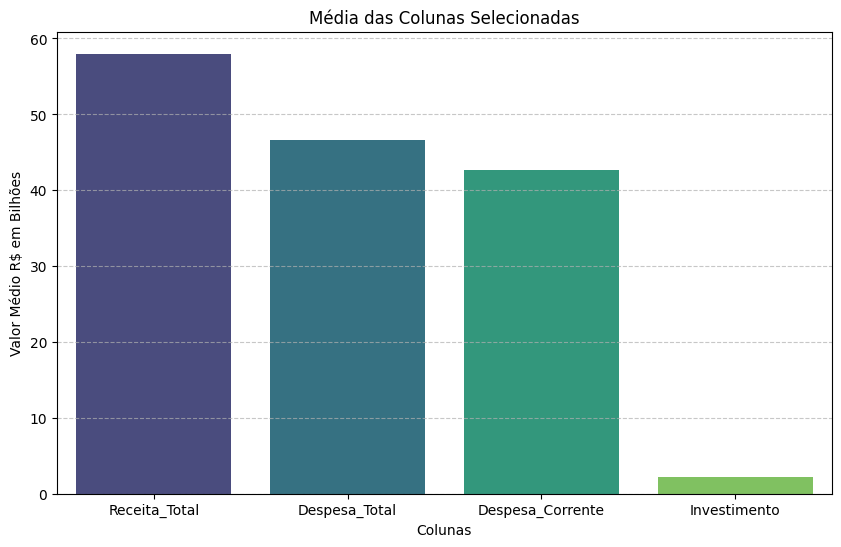

In [55]:
# Colunas que você quer exibir a média
colunas_para_media = ['Receita_Total', 'Despesa_Total', 'Despesa_Corrente', 'Investimento']

# Calcula a média das colunas selecionadas
medias = df_real_bilhao[colunas_para_media].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=medias.index, y=medias.values, palette='viridis')
plt.title('Média das Colunas Selecionadas')
plt.xlabel('Colunas')
plt.ylabel('Valor Médio R$ em Bilhões')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gráfico com a média das 4 principais contas durante o período de 2018 a 2024 dos Estados Brasileiros:
- `Receita_Total`: média da receita total;
- `Despesa_Total`: média da despesa total, incluindo todos os tipos de despesas;
- `Despesa_Corrente`: média da despesa corrente. A despesa corrente nas contas públicas é o conjunto de gastos realizados pelo governo para manter seu funcionamento regular, sem gerar novos bens ou serviços duradouros. Ela cobre principalmente despesas obrigatórias, administrativas e operacionais que ocorrem ano após ano.
- `Investimento`: média do investimento. É uma despesa de capital destinada à aquisição ou construção de bens duradouros que aumentam o patrimônio público ou melhoram os serviços à população.


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [56]:
# desvio padrão dos atributos numéricos do dataset
df_real_bilhao.describe().loc['std']

,std
Codigo_UF,12.820791
Ano,1.713121
Receita_Total,69.553037
Receita_Exceto_Intra,62.313309
Receita_Corrente,61.060048
Receita_Capital,1.539366
Receita_Intra,8.177913
Receita_Intra_Corrente,8.015068
Receita_Intra_Capital,0.232779
Despesa_Total,64.545083


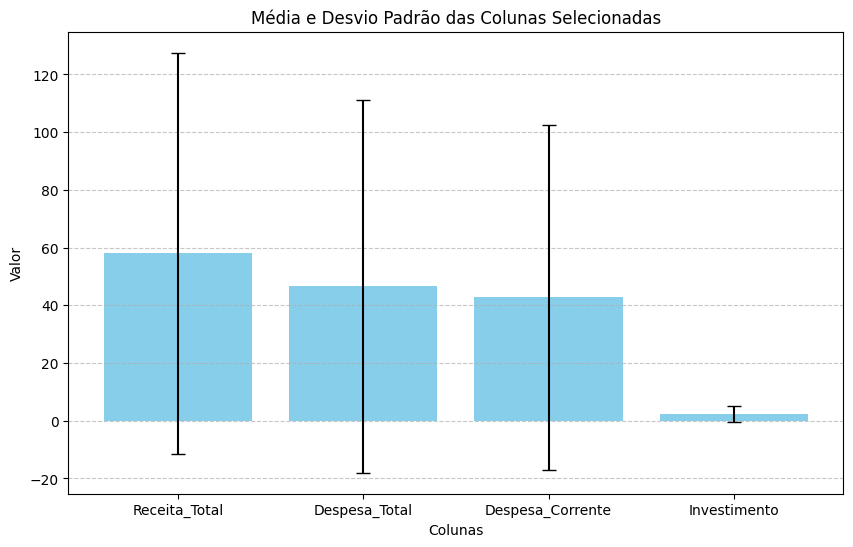

In [57]:
# Colunas que você quer exibir a média e o desvio padrão
colunas_para_analise = ['Receita_Total', 'Despesa_Total', 'Despesa_Corrente', 'Investimento']

# Calcular as médias e desvios padrão
medias = df_real_bilhao[colunas_para_analise].mean()
desvios_padrao = df_real_bilhao[colunas_para_analise].std()

# Criar um DataFrame para facilitar a plotagem
df_plot = pd.DataFrame({
    'Média': medias,
    'Desvio Padrão': desvios_padrao
})

plt.figure(figsize=(10, 6))
# Usamos barras de erro para representar o desvio padrão
plt.bar(df_plot.index, df_plot['Média'], yerr=df_plot['Desvio Padrão'], capsize=5, color='skyblue')
plt.title('Média e Desvio Padrão das Colunas Selecionadas')
plt.xlabel('Colunas')
plt.ylabel('Valor')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observamos que:
- Grande desvio padrão em **Receita**, **Despesa Total** e **Corrente** indica grande desigualdade entre os entes (ex: SP vs. AP).
- **Despesas correntes** dominam o orçamento dos entes públicos, com média próxima à despesa total.
- **Investimentos** são muito pequenos em comparação — representam uma pequena fração do orçamento.
- O baixo desvio padrão de **Investimento** sugere que mesmo os entes com maiores orçamentos não investem proporcionalmente mais, o investimento é geralmente baixo em todos.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das contas podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

Matriz de Correlação para as Contas Selecionadas:

                  Receita_Total  Receita_Corrente  Despesa_Total  \
Receita_Total          1.000000          0.998195       0.989504   
Receita_Corrente       0.998195          1.000000       0.984153   
Despesa_Total          0.989504          0.984153       1.000000   
Despesa_Corrente       0.988813          0.982629       0.999451   
Despesa_Capital        0.918989          0.923480       0.927036   
Investimento           0.823165          0.833979       0.823020   

                  Despesa_Corrente  Despesa_Capital  Investimento  
Receita_Total             0.988813         0.918989      0.823165  
Receita_Corrente          0.982629         0.923480      0.833979  
Despesa_Total             0.999451         0.927036      0.823020  
Despesa_Corrente          1.000000         0.914105      0.806078  
Despesa_Capital           0.914105         1.000000      0.949625  
Investimento              0.806078         0.949625      1.00000

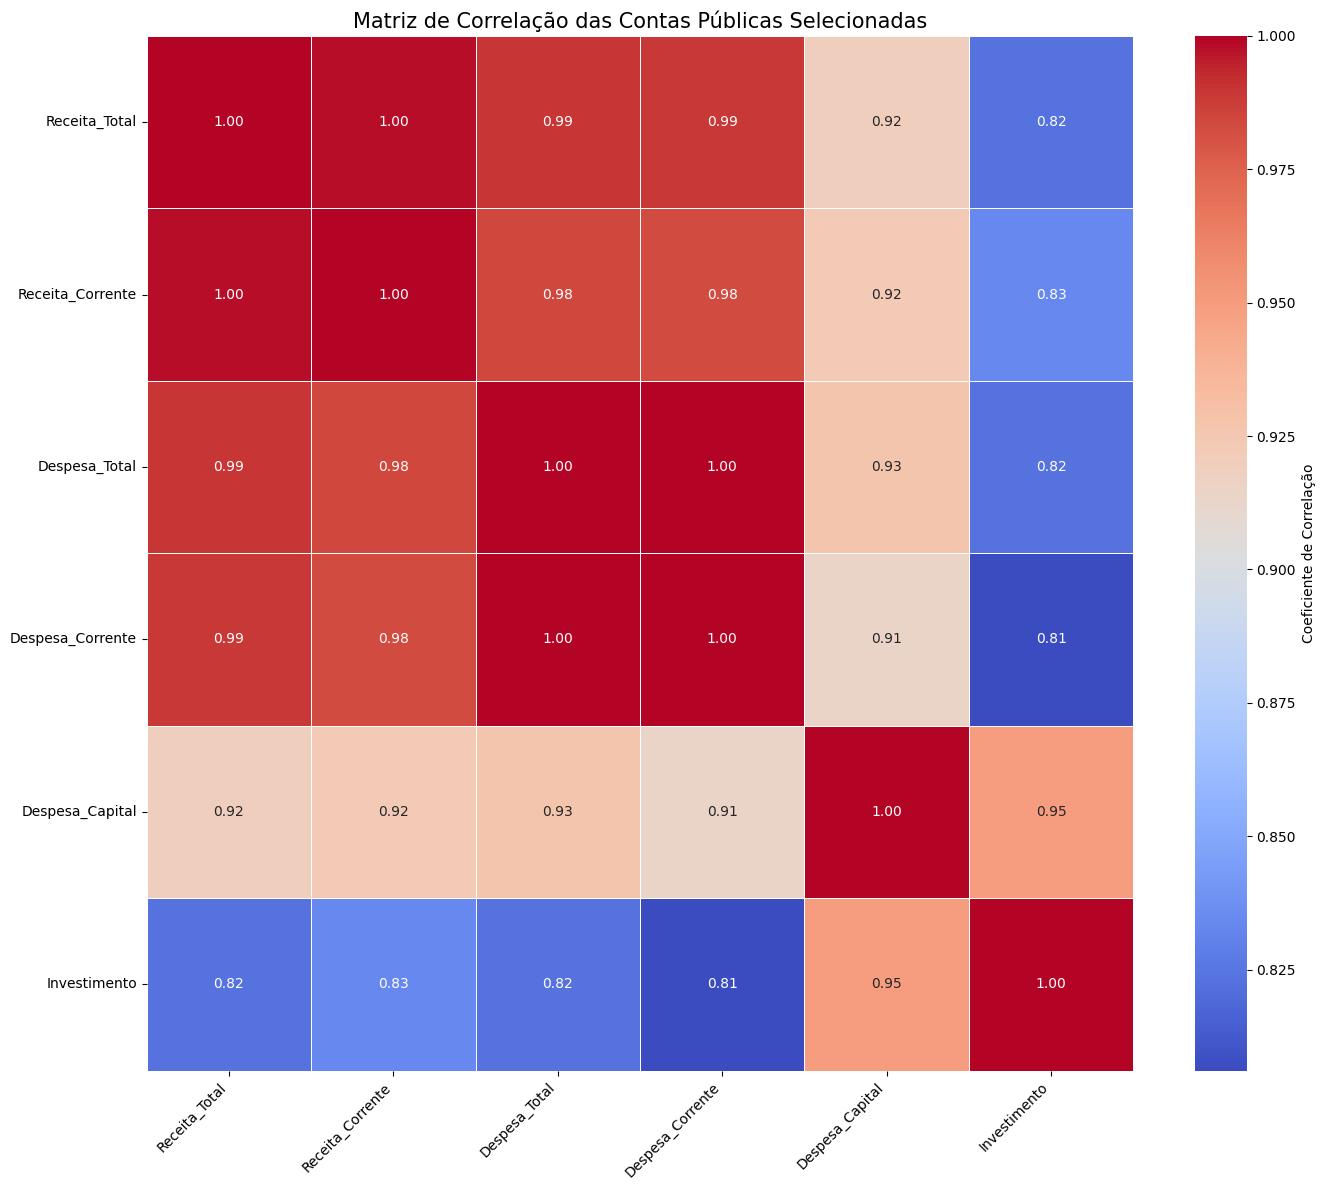

In [58]:


# 1. Selecionar APENAS as colunas que você quer na matriz de correlação ---
colunas_para_correlacao = [
    'Receita_Total', 'Receita_Corrente',
    'Despesa_Total', 'Despesa_Corrente',
    'Despesa_Capital', 'Investimento'
]

# Filtrar o DataFrame para conter apenas essas colunas
df_para_corr = df_real_bilhao[colunas_para_correlacao]

# 2. Criar a Matriz de Correlação ---
matriz_correlacao = df_para_corr.corr()

print("Matriz de Correlação para as Contas Selecionadas:\n")
print(matriz_correlacao)

# 3. Visualizar a Matriz de Correlação como um Heatmap ---
plt.figure(figsize=(14, 12)) # Ajusta o tamanho para uma matriz maior
sns.heatmap(
    matriz_correlacao,
    annot=True,     # Mostra os valores de correlação
    cmap='coolwarm',# Azul para correlação positiva, vermelho para negativa
    fmt=".2f",      # Formata os valores com 2 casas decimais
    linewidths=.5,  # Adiciona linhas entre as células
    cbar_kws={'label': 'Coeficiente de Correlação'} # Adiciona rótulo à barra de cor
)
plt.title('Matriz de Correlação das Contas Públicas Selecionadas', fontsize=15)
plt.xticks(rotation=45, ha='right') # Rotaciona rótulos do eixo X para melhor legibilidade
plt.yticks(rotation=0) # Mantém rótulos do eixo Y na horizontal
plt.tight_layout() # Ajusta o layout para garantir que tudo caiba na figura
plt.savefig('matriz_correlacao_contas_publicas.png', dpi=300) # Salva o gráfico
plt.show()

 Interpretação do coeficiente de correlação:

Valor	Interpretação:

- +1.00	Correlação perfeita e positiva
- 0.70 a 0.99	Correlação forte positiva
- 0.40 a 0.69	Correlação moderada positiva
- 0.00 a 0.39	Correlação fraca ou nula
Valores negativos	Correlação negativa (não apareceu no gráfico)

Com essa matriz de correlação chegamos as seguintes conclusões:
- `Receita_Total`, `Receita_Corrente`, `Despesa_Total` e `Despesa_Corrente` apreserentam Correlações fortíssimas entre si (0.98 a 1.00). Quando a receita cresce, a despesa também cresce (e vice-versa).
- `Despesa_Capital`: Correlações fortes com `Receita_Total` e `Despesa_Total` (0.91 a 0.93). Significa que quando o ente tem mais arrecadação e despesa total, parte disso pode ir para despesas de capital (como investimentos em obras ou equipamentos).
- `Investimento`: Correlação moderada (0.64) com todas as variáveis. Isso sugere que o investimento não cresce proporcionalmente ao aumento da receita ou despesa total. Ou seja, mesmo quando os entes arrecadam mais, eles nem sempre investem mais, priorizam despesas correntes.

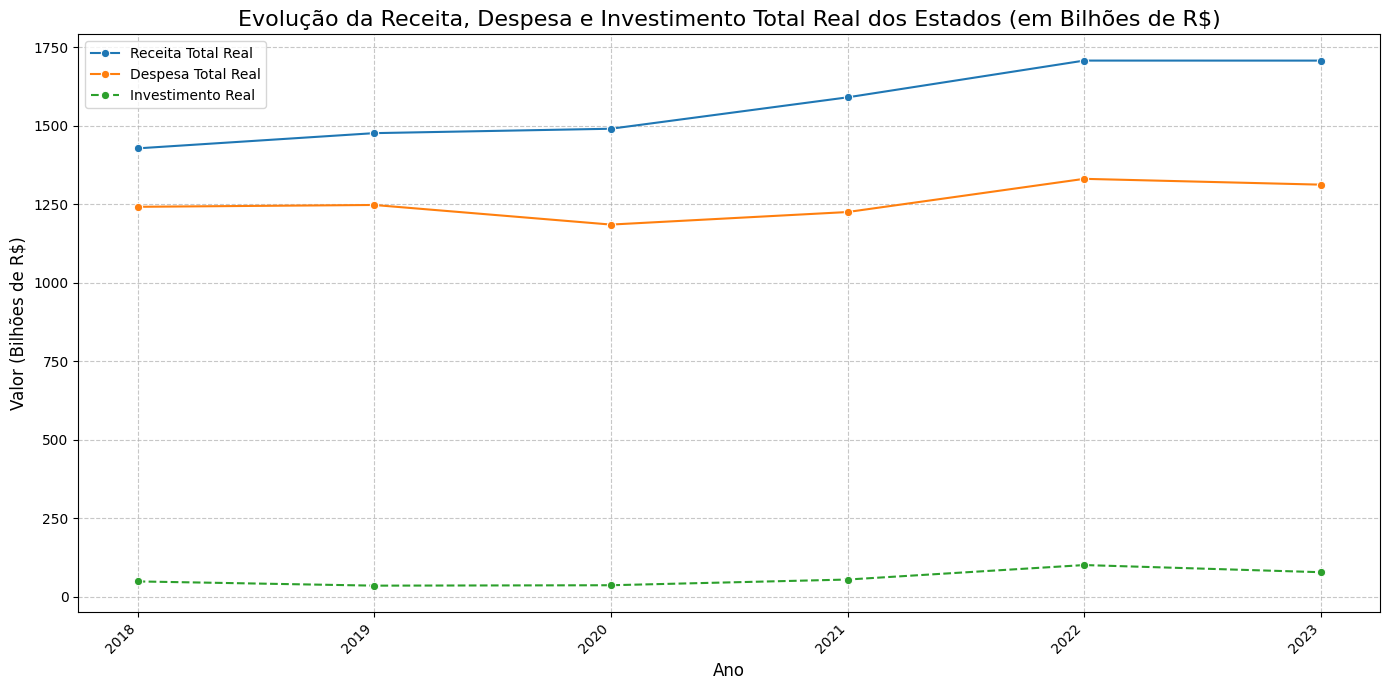


Dados agregados para a evolução anual (Receita, Despesa e Investimento em Bilhões de R$):
    Ano  Receita_Total  Despesa_Total  Investimento
0  2018    1427.472795    1241.450939     49.040675
1  2019    1475.933167    1247.274617     35.578039
2  2020    1489.937743    1184.882114     36.874024
3  2021    1589.868757    1224.825062     54.998854
4  2022    1706.875300    1330.485811    101.127267
5  2023    1706.800133    1311.953618     78.353679


In [59]:
# 1. Agrupar os dados por 'Ano' e somar as colunas de interesse
# As colunas em 'df_real_bilhao' já estão em bilhões de R$.
evolucao_anual = df_real_bilhao.groupby('Ano')[['Receita_Total', 'Despesa_Total', 'Investimento']].sum().reset_index()

# 2. Criar o gráfico de linha
plt.figure(figsize=(14, 7)) # Tamanho do gráfico para melhor visualização

# Linha para Receita Total
sns.lineplot(data=evolucao_anual, x='Ano', y='Receita_Total', marker='o', label='Receita Total Real')

# Linha para Despesa Total
sns.lineplot(data=evolucao_anual, x='Ano', y='Despesa_Total', marker='o', label='Despesa Total Real')

# Linha para Investimento
sns.lineplot(data=evolucao_anual, x='Ano', y='Investimento', marker='o', label='Investimento Real', linestyle='--') # Adicionando um linestyle diferente para destacar

# Adicionar título e rótulos
plt.title('Evolução da Receita, Despesa e Investimento Total Real dos Estados (em Bilhões de R$)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor (Bilhões de R$)', fontsize=12)

# Adicionar grade para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar legenda
plt.legend(fontsize=10)

# Ajustar os ticks do eixo X para mostrar todos os anos, se possível
plt.xticks(evolucao_anual['Ano'].unique(), rotation=45, ha='right')

# Melhorar o layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico
plt.show()

print("\nDados agregados para a evolução anual (Receita, Despesa e Investimento em Bilhões de R$):")
print(evolucao_anual)

A `Receita_Total` e o `Investimento` não são uniformes no decorrer da série temporal, mas apresentam aumentos e diminuições nos valores.



Primeiras linhas do DataFrame com os novos percentuais:
    Ano  UF  Investimento  Despesa_Total  Perc_Investimento_Despesa
0  2018  AC      0.558861       9.069096                   6.162259
1  2019  AC      0.181323       8.287293                   2.187963
2  2020  AC      0.248930       8.344845                   2.983040
3  2021  AC      0.414198       8.721931                   4.748924
4  2022  AC      0.802666      10.301058                   7.792072


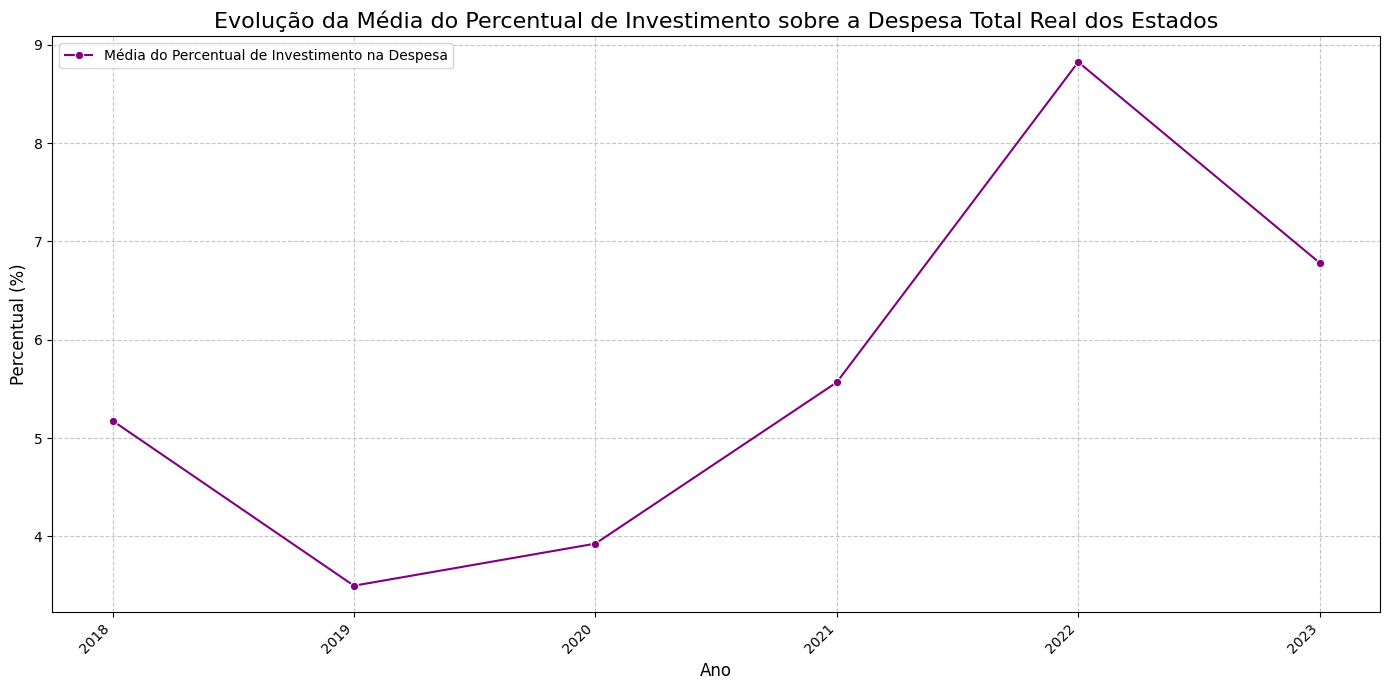

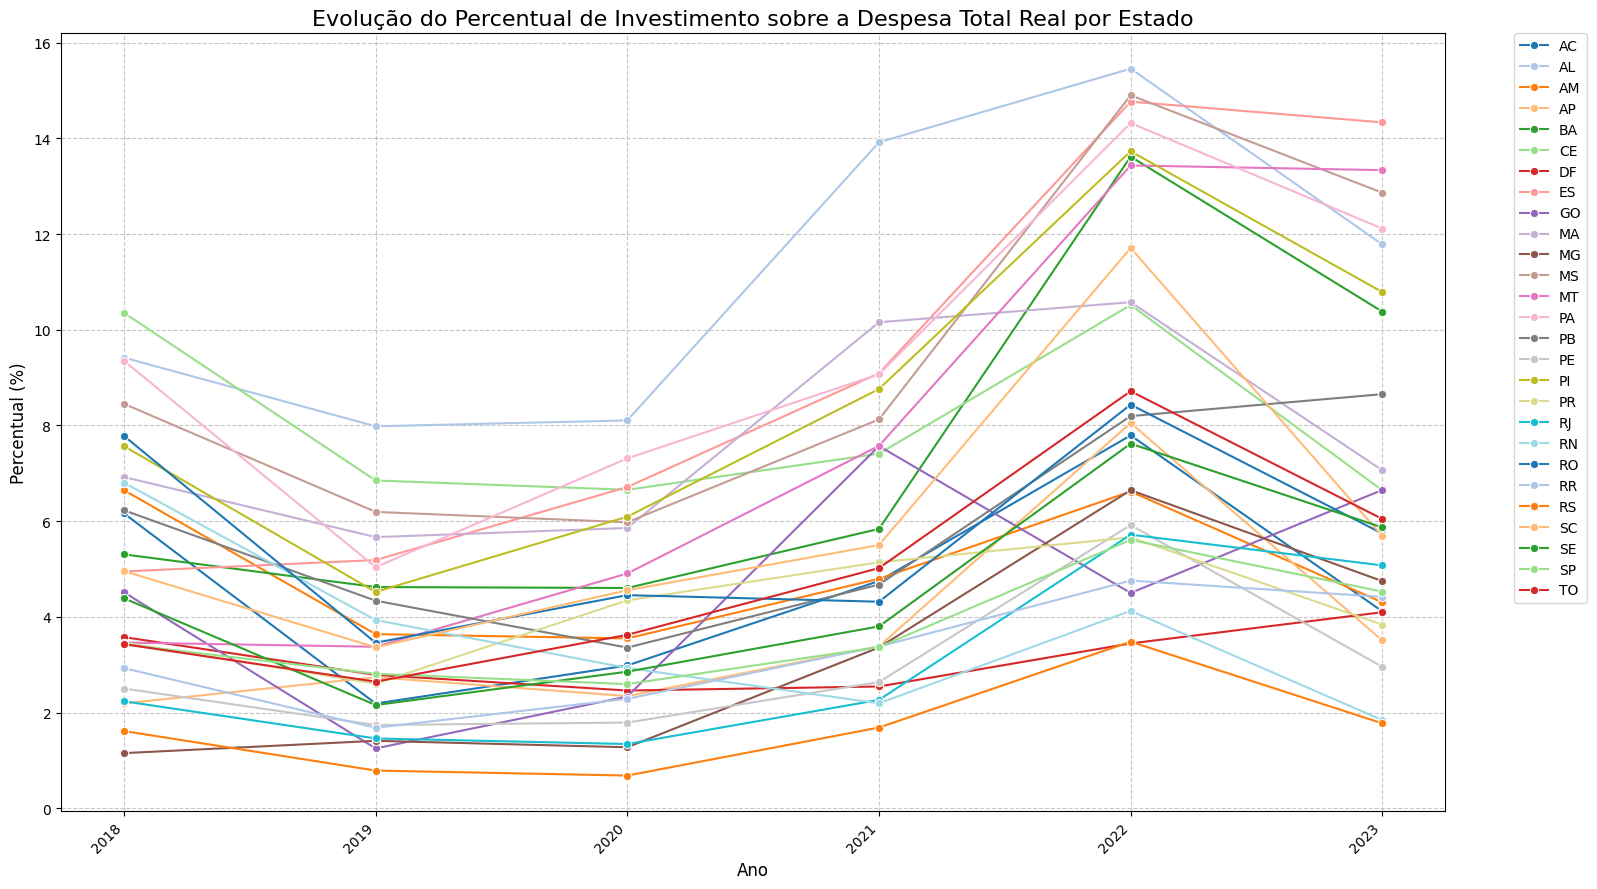

In [60]:
# 1. Calcular o percentual de Investimento sobre a Despesa Total
# Evite divisão por zero: se Despesa_Total for 0, o percentual será NaN
df_real_bilhao['Perc_Investimento_Despesa'] = (
    df_real_bilhao['Investimento'] / df_real_bilhao['Despesa_Total']
) * 100

# Opcional: Calcular também o percentual de Investimento sobre a Receita Total
df_real_bilhao['Perc_Investimento_Receita'] = (
    df_real_bilhao['Investimento'] / df_real_bilhao['Receita_Total']
) * 100

print("Primeiras linhas do DataFrame com os novos percentuais:")
print(df_real_bilhao[['Ano', 'UF', 'Investimento', 'Despesa_Total', 'Perc_Investimento_Despesa']].head())

# 2. Agrupar para ver a média anual do percentual (se quiser uma visão consolidada)
# Para uma visão macro (todos os estados juntos)
evolucao_perc_investimento_anual = df_real_bilhao.groupby('Ano')['Perc_Investimento_Despesa'].mean().reset_index()

# 3. Criar o gráfico de linha para o percentual médio
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=evolucao_perc_investimento_anual,
    x='Ano',
    y='Perc_Investimento_Despesa',
    marker='o',
    color='purple',
    label='Média do Percentual de Investimento na Despesa'
)

plt.title('Evolução da Média do Percentual de Investimento sobre a Despesa Total Real dos Estados', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(evolucao_perc_investimento_anual['Ano'].unique(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Criar um gráfico de linha para o percentual de investimento por estado
# Este gráfico mostrará como cada estado se comporta
plt.figure(figsize=(16, 9)) # Tamanho maior para acomodar mais linhas e legenda

sns.lineplot(
    data=df_real_bilhao,
    x='Ano',
    y='Perc_Investimento_Despesa',
    hue='UF', # 'hue' é crucial para separar as linhas por estado
    marker='o',
    palette='tab20' # Uma paleta de cores com mais opções
)

plt.title('Evolução do Percentual de Investimento sobre a Despesa Total Real por Estado', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Move a legenda para fora
plt.xticks(df_real_bilhao['Ano'].unique(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Evolução média do percentual de **Investimento** sobre a **Despesa Total Real** dos Estados apresenta um aumento acentuado entre os anos de 2020 a 2021. Essa linha do gráfico é parecida na maior parte dos estados. Isso deve-se a um fato comum a todos, o episódio da pandemia de COVID-19 que obrigou os entes públicos a aumentarem significativamente seus investimentos na saúde pública.

Em 2022 ocorre o ponto mais alto e logo em seguido uma tendência de queda.

Somatório Total de Despesa por UF (todos os anos no DataFrame):

    UF  Despesa_Total
25  SP    2029.868715
10  MG     778.825233
18  RJ     559.434168
22  RS     504.530976
4   BA     410.997006
17  PR     363.670720
15  PE     303.918483
13  PA     237.214803
23  SC     236.090837
8   GO     225.910330
5   CE     218.450001
6   DF     197.347041
12  MT     168.964823
2   AM     163.525260
9   MA     144.042970
7   ES     134.055555
11  MS     128.073377
19  RN     102.503749
16  PI     100.140004
14  PB      91.305478
1   AL      88.838305
26  TO      80.399431
24  SE      78.471496
20  RO      63.516404
0   AC      55.138333
3   AP      41.513477
21  RR      34.125187


/tmp/ipython-input-61-3038745691.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Despesa_Total', y='UF', data=despesa_total_por_uf, palette='cividis')


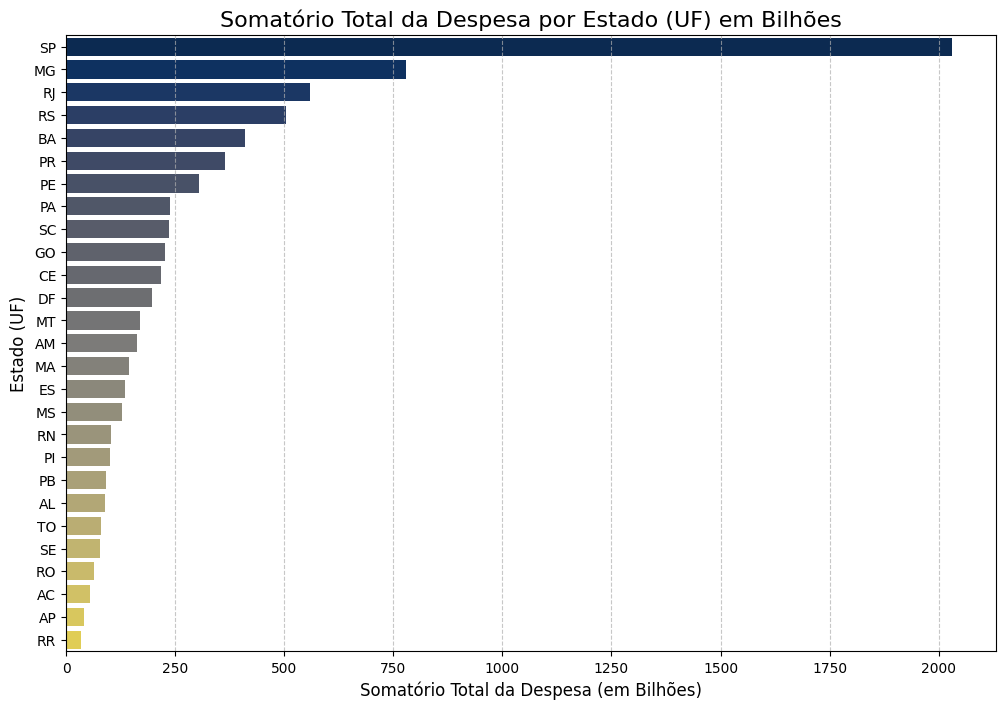

In [61]:
# Calcula o somatório da Despesa Total por UF
despesa_total_por_uf = df_real_bilhao.groupby('UF')['Despesa_Total'].sum().reset_index()

# Opcional: Ordene os dados para facilitar a leitura do gráfico (maior para o menor)
despesa_total_por_uf = despesa_total_por_uf.sort_values(by='Despesa_Total', ascending=False)

print("Somatório Total de Despesa por UF (todos os anos no DataFrame):\n")
print(despesa_total_por_uf)

plt.figure(figsize=(12, 8)) # Define o tamanho do gráfico

# Cria o gráfico de barras horizontal (invertido)
# 'x' será a coluna numérica (Despesa_Total) e 'y' será a coluna categórica (UF)
sns.barplot(x='Despesa_Total', y='UF', data=despesa_total_por_uf, palette='cividis')

plt.title('Somatório Total da Despesa por Estado (UF) em Bilhões', fontsize=16)
plt.xlabel('Somatório Total da Despesa (em Bilhões)', fontsize=12)
plt.ylabel('Estado (UF)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Adiciona grade no eixo X
plt.show()

No gráfico acima pode-se observar a **Despesa Total** dos Estados no período analisado. Estados das regiões sudeste e sul dominam as primeiras posições. São Paulo que ficou em primeiro lugar gastou quase três vezes mais que o segundo colocado Minas Gerais. Rio de Janeiro e Rio Grande do Sul completam o pódio dos "4+".

Somatório de Investimento por UF:

    UF  Investimento
25  SP     76.245860
4   BA     31.701862
10  MG     23.246118
13  PA     23.122143
5   CE     17.654357
18  RJ     17.652916
17  PR     14.892789
23  SC     14.616373
12  MT     13.987082
7   ES     12.562756
11  MS     12.507645
9   MA     11.192501
1   AL     10.146627
8   GO     10.091339
15  PE      9.098202
16  PI      8.797331
22  RS      8.158059
2   AM      8.086015
6   DF      6.256323
14  PB      5.581924
26  TO      4.116669
20  RO      3.703801
19  RN      3.595792
24  SE      3.556273
0   AC      2.634341
3   AP      1.587154
21  RR      1.180286


/tmp/ipython-input-62-213075782.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Investimento', y='UF', data=investimento_por_uf, palette='viridis')


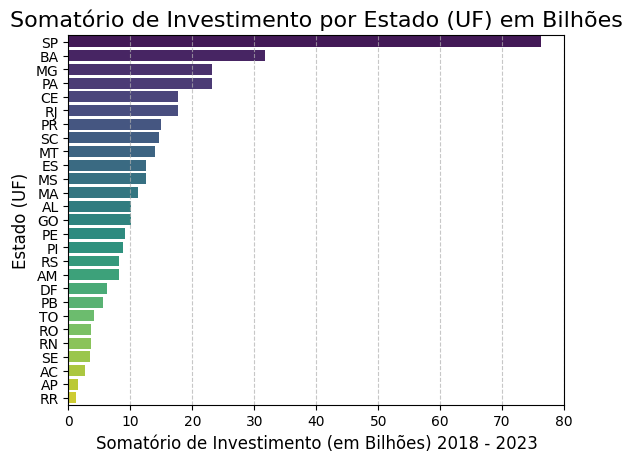

In [62]:
# Calcula o somatório do Investimento por UF
investimento_por_uf = df_real_bilhao.groupby('UF')['Investimento'].sum().reset_index()

# Ordena os dados para que o gráfico seja mais fácil de ler, do maior para o menor
investimento_por_uf = investimento_por_uf.sort_values(by='Investimento', ascending=False)

print("Somatório de Investimento por UF:\n")
print(investimento_por_uf)

# Cria o gráfico de barras horizontal (inverted bar chart)
# 'x' será a coluna numérica (Investimento) e 'y' será a coluna categórica (UF)
sns.barplot(x='Investimento', y='UF', data=investimento_por_uf, palette='viridis')

plt.title('Somatório de Investimento por Estado (UF) em Bilhões', fontsize=16)
plt.xlabel('Somatório de Investimento (em Bilhões) 2018 - 2023', fontsize=12)
plt.ylabel('Estado (UF)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade no eixo X para facilitar a leitura dos valores
plt.show()

Quando soma-se o **Investimento** por Estado durante o perído analisado de 2018 a 2023 verifica-se uma disparidade enorme entre os entes federativos. Na composição do ranking São Paulo continua isolado em primeiro lugar, Bahia que no gráfico anterior aparecia em quinto lugar aparece como segundo colocado. Minas Gerais em terceiro colocado. Rio de Janeiro caiu para a sétima colocação.

Chama a atenção o fato do Rio Grande do Sul ter caído para a décima sétima colocação. Isso acende um alerta que o estado pode estar em crise fiscal, priorizando o pagamento das suas despesas obrigatórias a chamada **Despesa Corrente** (despesa obrigatória como salários), sobrando poucos recursos para o **Investimento** que é uma despesa discrionária.

Os 5 estados que mais investem (em % da despesa total) no período total são: ['AL', 'PA', 'MS', 'ES', 'PI']

Média do Percentual de Investimento na Despesa Total para estes estados:
    UF  Perc_Investimento_Despesa
1   AL                  11.110107
13  PA                   9.534097
11  MS                   9.418470
7   ES                   9.172945
16  PI                   8.576432


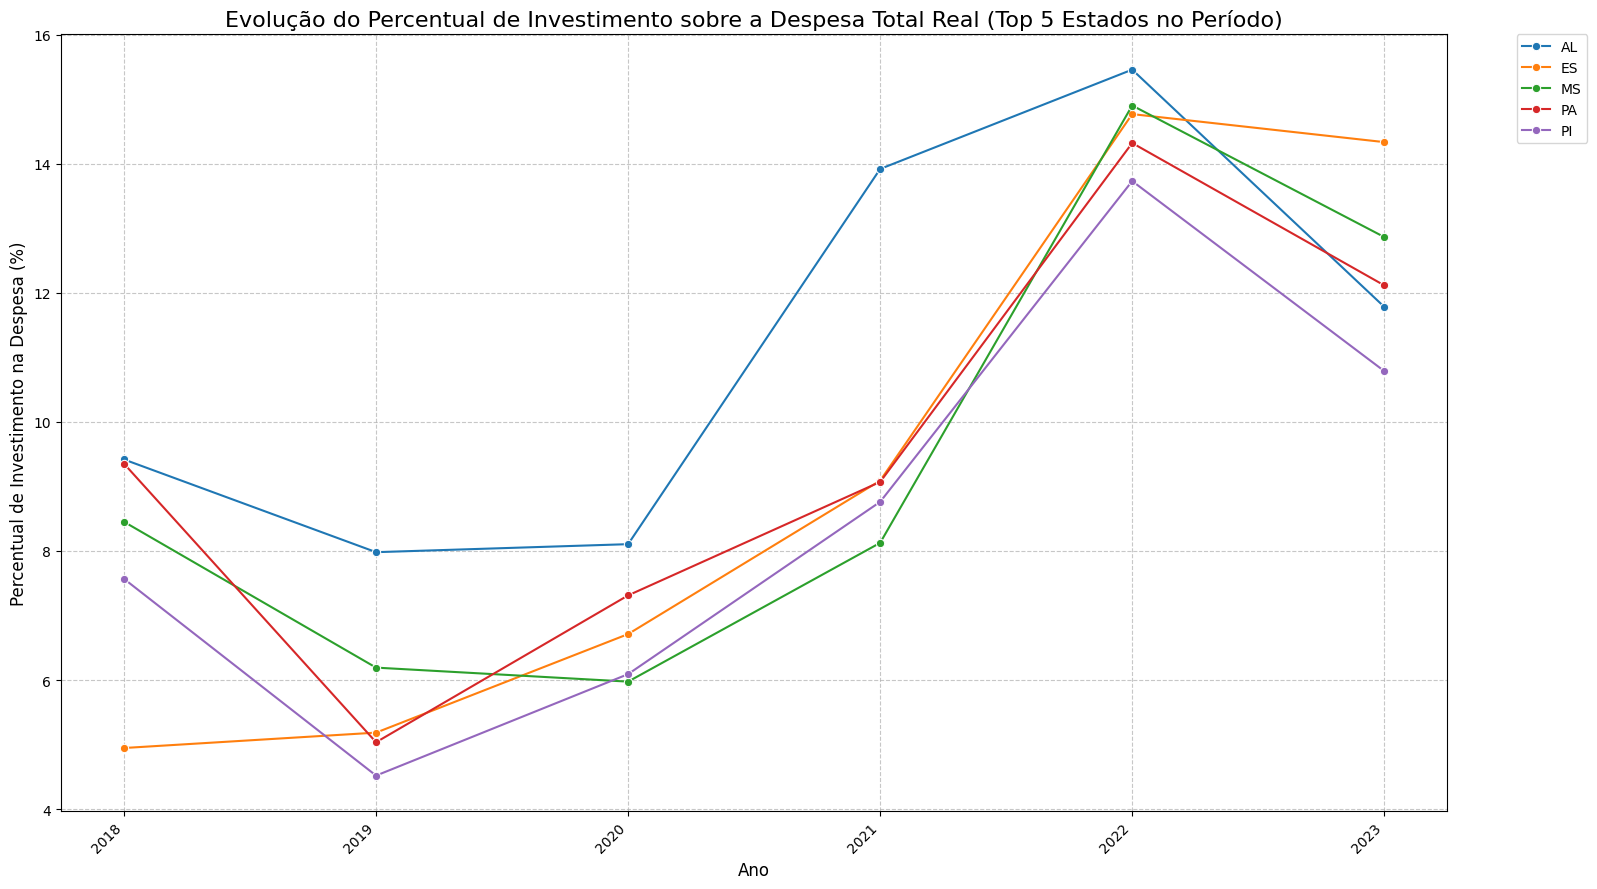

In [63]:
# 1. Garantir que a coluna de percentual de investimento sobre a despesa exista
if 'Perc_Investimento_Despesa' not in df_real_bilhao.columns:
    df_real_bilhaof['Perc_Investimento_Despesa'] = (
        df_real_bilhao['Investimento'] / df_real_bilhao['Despesa_Total']
    ) * 100
    df_real_bilhao['Perc_Investimento_Despesa'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
    df_real_bilhao.dropna(subset=['Perc_Investimento_Despesa'], inplace=True)

# 2. Calcular o investimento PERCENTUAL TOTAL (somando por UF) para todo o período
investimento_medio_por_uf = df_real_bilhao.groupby('UF')['Perc_Investimento_Despesa'].mean().reset_index()

# 3. Identificar os 5 estados com a maior média de percentual de investimento
top_5_ufs_total = investimento_medio_por_uf.nlargest(5, 'Perc_Investimento_Despesa')
nomes_top_5 = top_5_ufs_total['UF'].tolist()

print(f"Os 5 estados que mais investem (em % da despesa total) no período total são: {nomes_top_5}")
print("\nMédia do Percentual de Investimento na Despesa Total para estes estados:")
print(top_5_ufs_total)

# 4. Filtrar o DataFrame original para incluir apenas esses 5 estados
df_top_5_consistente = df_real_bilhao[df_real_bilhao['UF'].isin(nomes_top_5)].copy()

# 5. Criar o gráfico de linha para a evolução desses 5 estados com uma nova paleta de cores
plt.figure(figsize=(16, 9))

# Usando uma paleta de cores 'tab10' ou 'Set1' ou 'Dark2'
# 'tab10' é uma boa escolha para até 10 categorias, com cores distintas.
# 'Set1' (até 9 cores) e 'Dark2' (até 8 cores) também são boas opções para contraste.
sns.lineplot(
    data=df_top_5_consistente,
    x='Ano',
    y='Perc_Investimento_Despesa',
    hue='UF',
    marker='o',
    palette='tab10' # Nova paleta de cores para maior diferenciação
)

plt.title('Evolução do Percentual de Investimento sobre a Despesa Total Real (Top 5 Estados no Período)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Percentual de Investimento na Despesa (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(df_top_5_consistente['Ano'].unique(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pela lógica estados que mais arrecadam são os que mais gastam. Quando muda-se a métrica de análise levando-se em consideração a relação **Investimento** sobre **Despesa Total** estados que não apareciam nos primeiros colocados nos gráficos anteriores assumem as posições.

Alagoas investiu no período analisado 11,11% de tudo que gasta com **Investimentos**. Foi seguido por Pará, Mato Grosso do Sul, Espírito Santo e Piauí.

Essa análise pode indicar que esses entes federativos estão com boa saúde fiscal, já que o **Investimento** é uma despesa discricionária.

Os 5 estados que MENOS investem (em % da despesa total) no período total são: ['RS', 'PE', 'RJ', 'MG', 'DF']

Média do Percentual de Investimento na Despesa Total para estes estados:
    UF  Perc_Investimento_Despesa
22  RS                   1.670354
15  PE                   2.923009
18  RJ                   3.014926
10  MG                   3.097666
6   DF                   3.151082


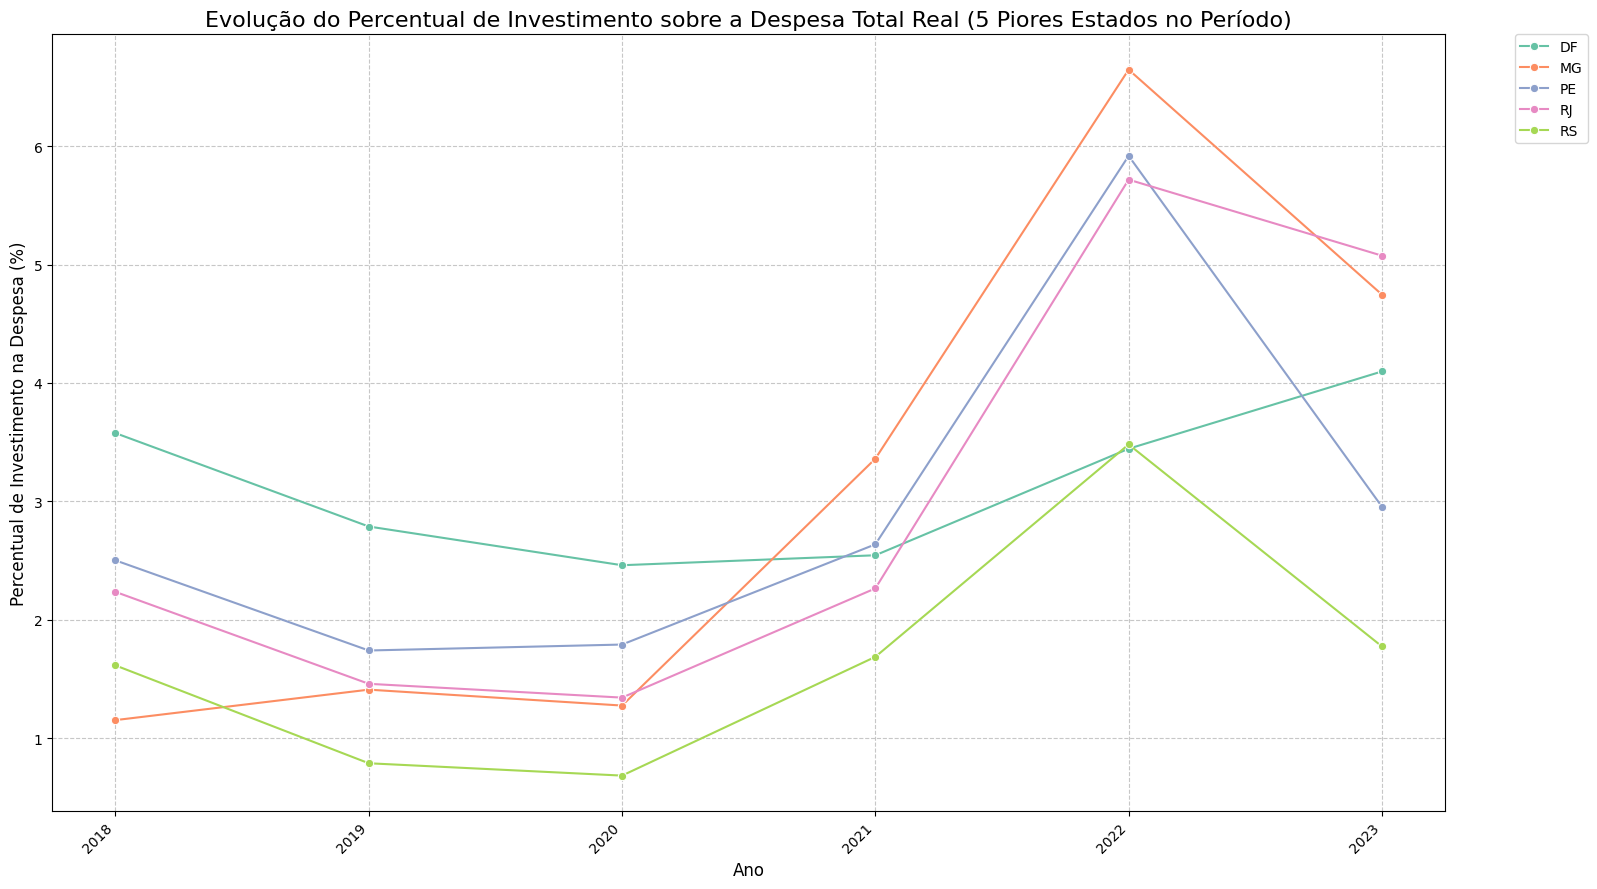

In [64]:
# 1. Garantir que a coluna de percentual de investimento sobre a despesa exista e esteja limpa
if 'Perc_Investimento_Despesa' not in df_real_bilhao.columns:
    df_real_bilhao['Perc_Investimento_Despesa'] = (
        df_real_bilhao['Investimento'] / df_real_bilhao['Despesa_Total']
    ) * 100
    df_real_bilhao['Perc_Investimento_Despesa'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
    df_real_bilhao.dropna(subset=['Perc_Investimento_Despesa'], inplace=True)

# 2. Calcular o investimento PERCENTUAL MÉDIO para cada UF ao longo de todo o período
investimento_medio_por_uf = df_real_bilhao.groupby('UF')['Perc_Investimento_Despesa'].mean().reset_index()

# 3. Identificar os 5 estados com a MENOR média de percentual de investimento
# Usamos .nsmallest() em vez de .nlargest()
bottom_5_ufs_total = investimento_medio_por_uf.nsmallest(5, 'Perc_Investimento_Despesa')
nomes_bottom_5 = bottom_5_ufs_total['UF'].tolist()

print(f"Os 5 estados que MENOS investem (em % da despesa total) no período total são: {nomes_bottom_5}")
print("\nMédia do Percentual de Investimento na Despesa Total para estes estados:")
print(bottom_5_ufs_total)

# 4. Filtrar o DataFrame original para incluir apenas esses 5 estados
df_bottom_5_consistente = df_real_bilhao[df_real_bilhao['UF'].isin(nomes_bottom_5)].copy()

# 5. Criar o gráfico de linha para a evolução desses 5 estados
plt.figure(figsize=(16, 9))

# Usando uma paleta de cores diferente para o grupo de "piores",
# talvez algo que sugira menor desempenho (ex: tons de cinza, ou cores menos vibrantes)
sns.lineplot(
    data=df_bottom_5_consistente,
    x='Ano',
    y='Perc_Investimento_Despesa',
    hue='UF',
    marker='o',
    palette='Set2' # 'Set2' ou 'Paired' ou 'Greys' (para tons de cinza)
)

plt.title('Evolução do Percentual de Investimento sobre a Despesa Total Real (5 Piores Estados no Período)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Percentual de Investimento na Despesa (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(df_bottom_5_consistente['Ano'].unique(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Já analisando a evolução percentual dos cinco piores índices de **Investimento** sobre a **Despesa Total** 3 estados que aparecem como primeiros colocados quando se analisa os valores brutos estão nesta lista.

Rio Grande do Sul na qual já havia sido comentado nos tópicos acima estar em último lugar dos estados com 1,67%. Completam o ranking Pernanbuco, Rio de Janeiro, Minas Gerais e Distrito Federal. Todos os estados dessa lista investiram menos de 5% no período analisado.

Percentual de Investimento sobre Despesa Total por UF:

    UF  Investimento_Total  Despesa_Total_Acumulada  \
1   AL           10.146627                88.838305   
11  MS           12.507645               128.073377   
13  PA           23.122143               237.214803   
7   ES           12.562756               134.055555   
16  PI            8.797331               100.140004   
12  MT           13.987082               168.964823   
5   CE           17.654357               218.450001   
9   MA           11.192501               144.042970   
4   BA           31.701862               410.997006   
23  SC           14.616373               236.090837   
14  PB            5.581924                91.305478   
20  RO            3.703801                63.516404   
26  TO            4.116669                80.399431   
2   AM            8.086015               163.525260   
0   AC            2.634341                55.138333   
24  SE            3.556273                78.471496   
8   GO   

/tmp/ipython-input-65-2423190347.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


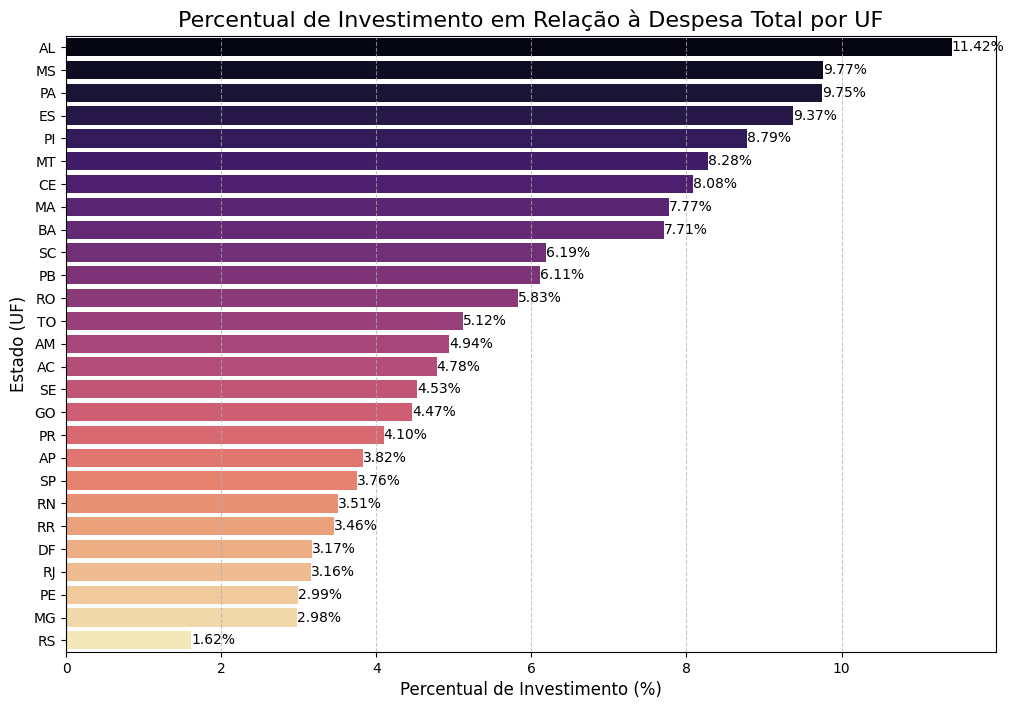

In [65]:
# 1. Calcular o somatório total de Investimento por UF
investimento_total_por_uf = df_real_bilhao.groupby('UF')['Investimento'].sum().reset_index()
investimento_total_por_uf.rename(columns={'Investimento': 'Investimento_Total'}, inplace=True)

# 2. Calcular o somatório total de Despesa_Total por UF
despesa_total_por_uf = df_real_bilhao.groupby('UF')['Despesa_Total'].sum().reset_index()
despesa_total_por_uf.rename(columns={'Despesa_Total': 'Despesa_Total_Acumulada'}, inplace=True)

# 3. Combinar os dois DataFrames
df_consolidado = pd.merge(investimento_total_por_uf, despesa_total_por_uf, on='UF', how='inner')

# 4. Calcular o percentual de Investimento sobre a Despesa Total
df_consolidado['%_Investimento_sobre_Despesa'] = (df_consolidado['Investimento_Total'] / df_consolidado['Despesa_Total_Acumulada']) * 100

# Opcional: Remover UFs com Despesa_Total_Acumulada zero para evitar divisão por zero
df_consolidado = df_consolidado[df_consolidado['Despesa_Total_Acumulada'] > 0]

# Ordenar para o gráfico
df_consolidado = df_consolidado.sort_values(by='%_Investimento_sobre_Despesa', ascending=False)

print("Percentual de Investimento sobre Despesa Total por UF:\n")
print(df_consolidado)

# 5. Gerar o gráfico de barras invertido
plt.figure(figsize=(12, 8))
sns.barplot(
    x='%_Investimento_sobre_Despesa',
    y='UF',
    data=df_consolidado,
    palette='magma' # Uma paleta de cores diferente
)

plt.title('Percentual de Investimento em Relação à Despesa Total por UF', fontsize=16)
plt.xlabel('Percentual de Investimento (%)', fontsize=12)
plt.ylabel('Estado (UF)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar rótulos de valor nas barras para melhor leitura
for index, value in enumerate(df_consolidado['%_Investimento_sobre_Despesa']):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='left', fontsize=10)

plt.show()

Nessa visão geral de todos os estados pode-se visualizar os percentuais dos valores investidos no período analisado. Chama atenção o fato de São Paulo que tem o maior **PIB** (Produto Interno Bruto) do Brasil e consequentemente a maior `Despesa Total` e `Investimento` brutos, em valores percentuais representou apenas **3,76%**.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [67]:
# X são as variáveis preditoras
X = df_real_bilhao[['Receita_Total', 'Despesa_Total', 'Despesa_Corrente']]

# y é a variável-alvo (aquilo que você quer prever)
y = df_real_bilhao['Investimento']

In [69]:
# divide o DataFrame em e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# teste_size=0.2: 20% dos dados vão para o teste.
# random_state=42: garante reprodutibilidade.

In [70]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (129, 3)
Dimensões de X_test: (33, 3)
Dimensões de y_train: (129,)
Dimensões de y_test: (33,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.

In [76]:
scaler_norm = MinMaxScaler()

# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [77]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [78]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   Receita_Total  Despesa_Total  Despesa_Corrente
0       0.876413       0.925651          0.955374
1       0.009594       0.011074          0.011529
2       0.033133       0.022007          0.021736
3       0.066025       0.044696          0.040445
4       0.061580       0.047881          0.047711


## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [81]:
scaler_std = StandardScaler()

In [84]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [86]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [87]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   Receita_Total  Despesa_Total  Despesa_Corrente
0       4.016385       4.456881          4.493309
1      -0.683201      -0.583935         -0.577750
2      -0.555580      -0.523680         -0.522914
3      -0.377254      -0.398623         -0.422395
4      -0.401350      -0.381068         -0.383356


# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As quatro hipóteses levantadas foram respondidas:

O Investimento público segue um padrão uniforme durante um determinado período de tempo ou apresenta variações?

Eficiência fiscal: avaliar se a maior Receita Total ou maior Despesa Total está associada a maior capacidade de investimento.

Estados com maiores gastos brutos são os que mais realizam investimentos em termos percentuais?

Prioridade em Investimentos: avaliar a tendência da alocação orçamentária. Estados priorizam despesas correntes em detrimento dos investimentos ao longo do tempo?